# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks. 

9. You may discuss broad ideas with friends, but all code must be written by yourself.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Plotting the data and prediction is highly encouraged for debugging. But remove debugging/understanding code before submitting.


In [0]:
# Cell type : CodeRead

import numpy as np
import matplotlib.pyplot as plt


**Cell type : TextRead**

# Problem 1: Learning Binary Bayes Classifiers from data with Max. Likelihood 

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. 

1a) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, I)$ and  $X|Y=1 \sim \mathcal{N}(\mu_+, I)$. *(Same known covariance)*

1b) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma)$ *(Same unknown covariance)*

1c) Assume $X|Y=-1 \sim \mathcal{N}(\mu_-, \Sigma_-)$ and $X|Y=1 \sim \mathcal{N}(\mu_+, \Sigma_+)$ *(different unknown covariance)*




In [0]:
# Cell type : CodeWrite

def Bayes1a(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    Xf=X_train.copy()
    Yff=Y_train.copy()
    Xft=X_test.copy()
    
    n,d = X_train.shape

    up=(Y_train+1)/2
    down=(1-Y_train)/2
    
    sup=np.sum(up)
    sdown=np.sum(down)
    #print (sup, sdown)
    
    a1=np.matmul(X_train.transpose(), up)
    a2=np.matmul(X_train.transpose(), down)
    
    mu1=a1/sup
    mu2=a2/sdown
    
    
    m,d=X_test.shape
    
    Y_test_pred=[]
    count=0
    for i in range(m):
        
        df1=X_test[i]-mu1
        df2=X_test[i]-mu2
        
        sq1=np.dot(df1,df1)
        sq2=np.dot(df2, df2)
        
        ans1=sup*np.exp(-sq1/2.0)
        ans2=sdown*np.exp(-sq2/2.0)
        
        if(ans1<ans2):
            Y_test_pred.append(-1)
        else:
            Y_test_pred.append(1)
            count=count+1
        
    #print(count)
    X_train=Xf.copy()
    Y_train=Yff.copy()
    X_test=Xft.copy()
    return Y_test_pred
    
    
def Bayes1b(X_train, Y_train, X_test):
    """ Give prediction for test instance using assumption 1b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    Xf=X_train.copy()
    Yff=Y_train.copy()
    Xft= X_test.copy()
    
    n,d=Xf.shape
    m,d1=X_test.shape
    
    up=(Y_train+1)/2
    down=(1-Y_train)/2
    
    sup=np.sum(up)
    sdown=np.sum(down)
    #print (sup, sdown)
    
    a1=np.matmul(Xf.transpose(), up)
    a2=np.matmul(Xf.transpose(), down)
    
    mu1=a1/sup
    mu2=a2/sdown
    #print(mu1,mu2)
    
    for i in range(n):
        for j in range(d):
            if(Y_train[i]==1):
                Xf[i,j]= Xf[i,j]-mu1[j]
            else:
                Xf[i,j]= Xf[i,j]-mu2[j]
    
    cov=np.matmul(Xf.transpose(),Xf)
    cov/=n
    covi=np.linalg.inv(cov)
    Y_test_pred=[]
    count=0
    for i in range(m):
        
        df1=X_test[i]-mu1
        df2=X_test[i]-mu2
        
        sq1=np.matmul(df1.transpose(),covi)
        sq11=np.matmul(sq1, df1)
        
        sq2=np.matmul(df2.transpose(),covi)
        sq22=np.matmul(sq2, df2)
        
        ans1=sup*np.exp(-sq11/2.0)
        ans2=sdown*np.exp(-sq22/2.0)
        
        if(ans1<ans2):
            Y_test_pred.append(-1)
        else:
            Y_test_pred.append(1)
            count=count+1
        
    #print(count)
    Y_train=Yff.copy()
    X_test=Xft.copy()
    return Y_test_pred
    
    
def Bayes1c(X_train, Y_train, X_test):
    """ 
    Give prediction for test instance using assumption 1c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: +1/-1 numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : +1/-1 numpy array of shape (m,)
    
    """
    m,d=X_test.shape
    X_train_pos = X_train[Y_train==1]
    X_train_neg = X_train[Y_train==-1]
    mu1=np.mean(X_train_pos, axis=0)
    mu2=np.mean(X_train_neg, axis=0) 
    X_train_pos -=mu1
    X_train_neg -=mu2
    cov1=np.matmul(X_train_pos.T, X_train_pos)/len(X_train_pos)
    cov1i=np.linalg.inv(cov1)
    cov2=np.matmul(X_train_neg.T, X_train_neg)/len(X_train_neg)
    cov2i=np.linalg.inv(cov2)
    Y_test_pred=[]
    for i in range(m):
        sq1=np.matmul(np.matmul((X_test[i]-mu1).T,cov1i),X_test[i]-mu1) 
        sq2=np.matmul(np.matmul((X_test[i]-mu2).T,cov2i),X_test[i]-mu2) 
        ans1=-sq1/2.0+np.log(len(X_train_pos)/np.sqrt(np.linalg.det(cov1)))
        ans2=-sq2/2.0+np.log(len(X_train_neg)/np.sqrt(np.linalg.det(cov2)))
        if(ans1<=ans2):
            Y_test_pred.append(-1.)
        else:
            Y_test_pred.append(1.)
    return np.array(Y_test_pred)

In [0]:
# Cell type : Convenience

# Testing the functions above

# To TAs: Replace this cell with the testing cell developed.

# To students: You may use the example here for testing syntax issues 
# with your functions, and also as a sanity check. But the final evaluation
# will be done for different inputs to the functions. (So you can't just 
# solve the problem for this one example given below.) 


X_train_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_train_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_train = np.concatenate((X_train_pos, X_train_neg), axis=0)
Y_train = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))
X_test_pos = np.random.randn(1000,2)+np.array([[1.,2.]])
X_test_neg = np.random.randn(1000,2)+np.array([[2.,4.]])
X_test = np.concatenate((X_test_pos, X_test_neg), axis=0)
Y_test = np.concatenate(( np.ones(1000), -1*np.ones(1000) ))

Y_pred_test_1a = Bayes1a(X_train, Y_train, X_test)
Y_pred_test_1b = Bayes1b(X_train, Y_train, X_test)
Y_pred_test_1c = Bayes1c(X_train, Y_train, X_test)




**Cell type : TextRead**

# Problem 1

1d) Run the above three algorithms (Bayes1a,1b and 1c), for the three datasets given (dataset1_1.npz, dataset1_2.npz, dataset1_3.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 3 datasets = 9 plots) on a 2d plot (color the positively classified area light green, and negatively classified area light red). Add the training data points also on the plot. Plots to be organised into 3 plots follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 9 plots appropriately. 

In the next Textwrite cell, summarise (use the plots of the data and the assumptions in the problem to explain) your observations regarding the six learnt classifiers, and also give the error rate of the three classifiers on the three datasets as 3x3 table, with appropriately named rows and columns.


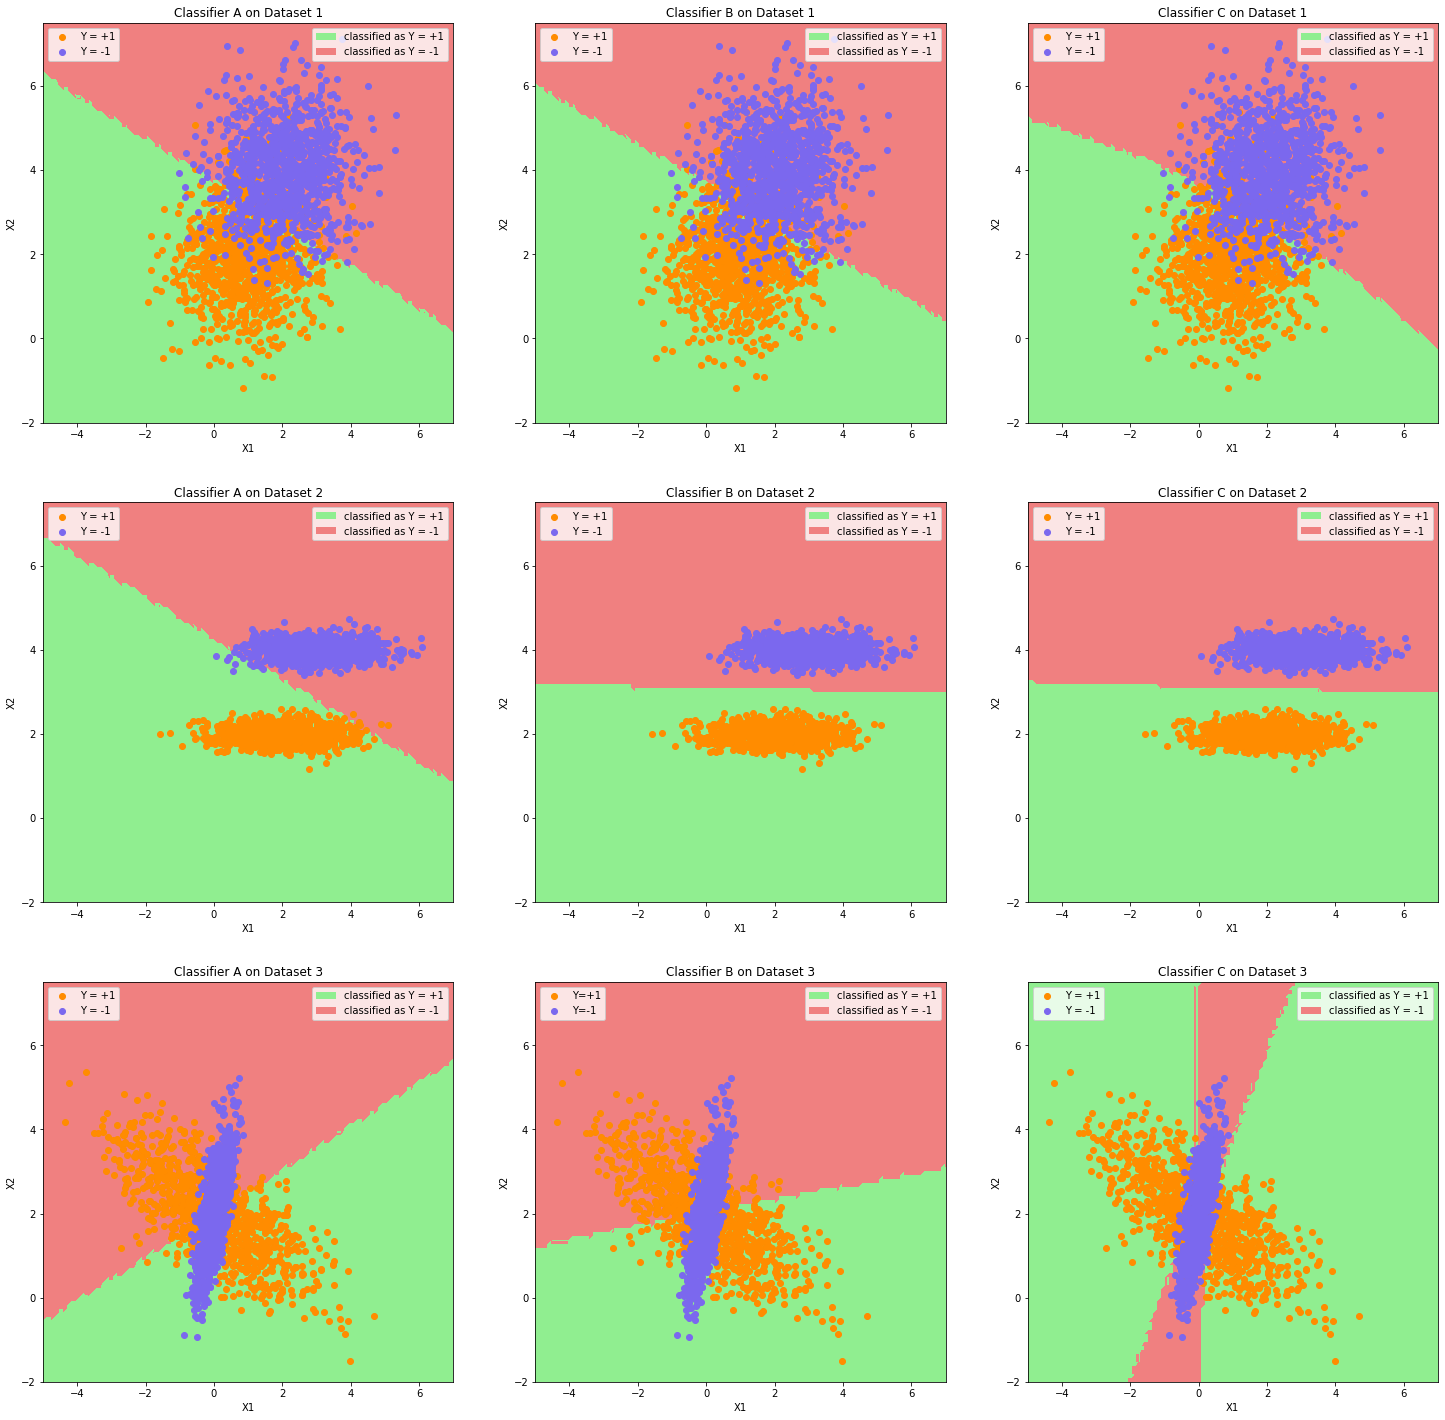

In [0]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)

# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
X_train1 = np.load('dataset1_1/arr_0.npy')
X_train1 = np.load('dataset1_1/arr_0.npy')
Y_train1 = np.load('dataset1_1/arr_1.npy')
X_test1  = np.load('dataset1_1/arr_2.npy')
Y_test1  = np.load('dataset1_1/arr_3.npy')
X_train2 = np.load('dataset1_2/arr_0.npy')
Y_train2 = np.load('dataset1_2/arr_1.npy')
X_test2  = np.load('dataset1_2/arr_2.npy')
Y_test2  = np.load('dataset1_2/arr_3.npy')
X_train3 = np.load('dataset1_3/arr_0.npy')
Y_train3 = np.load('dataset1_3/arr_1.npy')
X_test3  = np.load('dataset1_3/arr_2.npy')
Y_test3  = np.load('dataset1_3/arr_3.npy')


Y_pred_test_1a_1 = Bayes1a(X_train1, Y_train1, X_test1)
Y_pred_test_1b_1 = Bayes1b(X_train1, Y_train1, X_test1)
Y_pred_test_1c_1 = Bayes1c(X_train1, Y_train1, X_test1)

Y_pred_test_1a_2 = Bayes1a(X_train2, Y_train2, X_test2)
Y_pred_test_1b_2 = Bayes1b(X_train2, Y_train2, X_test2)
Y_pred_test_1c_2 = Bayes1c(X_train2, Y_train2, X_test2)

Y_pred_test_1a_3 = Bayes1a(X_train3, Y_train3, X_test3)
Y_pred_test_1b_3 = Bayes1b(X_train3, Y_train3, X_test3)
Y_pred_test_1c_3 = Bayes1c(X_train3, Y_train3, X_test3)

error = np.ndarray(shape=(3,3))
error[0][0] = len(np.where(Y_pred_test_1a_1 != Y_test1)[0])/(len(Y_test1))
error[0][1] = len(np.where(Y_pred_test_1b_1 != Y_test1)[0])/(len(Y_test1))
error[0][2] = len(np.where(Y_pred_test_1c_1 != Y_test1)[0])/(len(Y_test1))
error[1][0] = len(np.where(Y_pred_test_1a_2 != Y_test2)[0])/(len(Y_test2))
error[1][1] = len(np.where(Y_pred_test_1b_2 != Y_test2)[0])/(len(Y_test2))
error[1][2] = len(np.where(Y_pred_test_1c_2 != Y_test2)[0])/(len(Y_test2))
error[2][0] = len(np.where(Y_pred_test_1a_3 != Y_test3)[0])/(len(Y_test3))
error[2][1] = len(np.where(Y_pred_test_1b_3 != Y_test3)[0])/(len(Y_test3))
error[2][2] = len(np.where(Y_pred_test_1c_3 != Y_test3)[0])/(len(Y_test3))
#print (error)

n1=100
n2=100
x1=np.linspace(-5,7,n1)
x2=np.linspace(-2,7.5,n2)
x1,x2=np.meshgrid(x1,x2)
x1 = x1.reshape((n1*n2,1))
x2 = x2.reshape((n1*n2,1))
X = np.concatenate((x1,x2),axis=1)
X1 =x1.reshape((n1,n2))
X2 =x2.reshape((n1,n2))

Z11= np.asarray(Bayes1a(X_train1,Y_train1,X))
Z12= np.asarray(Bayes1b(X_train1,Y_train1,X))
Z13= np.asarray(Bayes1c(X_train1,Y_train1,X))

Z21= np.asarray(Bayes1a(X_train2,Y_train2,X))
Z22= np.asarray(Bayes1b(X_train2,Y_train2,X))
Z23= np.asarray(Bayes1c(X_train2,Y_train2,X))

Z31= np.asarray(Bayes1a(X_train3,Y_train3,X))
Z32= np.asarray(Bayes1b(X_train3,Y_train3,X))
Z33= np.asarray(Bayes1c(X_train3,Y_train3,X))

z11=Z11.reshape((n1,n2))
z12=Z12.reshape((n1,n2))
z13=Z13.reshape((n1,n2))
z21=Z21.reshape((n1,n2))
z22=Z22.reshape((n1,n2))
z23=Z23.reshape((n1,n2))
z31=Z31.reshape((n1,n2))
z32=Z32.reshape((n1,n2))
z33=Z33.reshape((n1,n2))

plt.figure(figsize=(25,25))
plt.subplot(3,3,1)
plt.gca().set_title("Classifier A on Dataset 1")
plt.gca().set_ylabel("X2")
plt.gca().set_xlabel("X1")
a = plt.contourf(X1,X2,z11,colors=['lightcoral', 'lightgreen'])
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) 
    for pc in a.collections]
contour = plt.legend(proxy[::-1], ["classified as Y = +1", "classified as Y = -1"] , loc= "upper right")
plt.gca().add_artist(contour)
plt.scatter(X_train1[Y_train1==1].T[0], X_train1[Y_train1==1].T[1], c="darkorange", label="Y = +1")
plt.scatter(X_train1[Y_train1==-1].T[0], X_train1[Y_train1==-1].T[1], c="mediumslateblue", label = "Y = -1")
plt.legend(loc = 2)

plt.subplot(3,3,2)
plt.gca().set_title("Classifier B on Dataset 1")
plt.gca().set_ylabel("X2")
plt.gca().set_xlabel("X1")
a = plt.contourf(X1,X2,z12,colors=['lightcoral', 'lightgreen'])
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) 
    for pc in a.collections]
contour = plt.legend(proxy[::-1], ["classified as Y = +1", "classified as Y = -1"] , loc= "upper right")
plt.gca().add_artist(contour)
plt.scatter(X_train1[Y_train1==1].T[0], X_train1[Y_train1==1].T[1], c="darkorange", label="Y = +1")
plt.scatter(X_train1[Y_train1==-1].T[0], X_train1[Y_train1==-1].T[1], c="mediumslateblue", label="Y = -1")
plt.legend(loc = 2)

plt.subplot(3,3,3)
plt.gca().set_title("Classifier C on Dataset 1")
plt.gca().set_ylabel("X2")
plt.gca().set_xlabel("X1")
a = plt.contourf(X1,X2,z13,colors=['lightcoral', 'lightgreen'])
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) 
    for pc in a.collections]
contour = plt.legend(proxy[::-1], ["classified as Y = +1", "classified as Y = -1"] , loc= "upper right")
plt.gca().add_artist(contour)
plt.scatter(X_train1[Y_train1==1].T[0], X_train1[Y_train1==1].T[1], c="darkorange", label="Y = +1")
plt.scatter(X_train1[Y_train1==-1].T[0], X_train1[Y_train1==-1].T[1], c="mediumslateblue", label="Y = -1")
plt.legend(loc = 2)

plt.subplot(3,3,4)
plt.gca().set_title("Classifier A on Dataset 2")
plt.gca().set_ylabel("X2")
plt.gca().set_xlabel("X1")
a = plt.contourf(X1,X2,z21,colors=['lightcoral', 'lightgreen'])
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) 
    for pc in a.collections]
contour = plt.legend(proxy[::-1], ["classified as Y = +1", "classified as Y = -1"] , loc= "upper right")
plt.gca().add_artist(contour)
plt.scatter(X_train2[Y_train2==1].T[0], X_train2[Y_train2==1].T[1], c="darkorange", label="Y = +1")
plt.scatter(X_train2[Y_train2==-1].T[0], X_train2[Y_train2==-1].T[1], c="mediumslateblue", label="Y = -1")
plt.legend(loc = 2)

plt.subplot(3,3,5)
plt.gca().set_title("Classifier B on Dataset 2")
plt.gca().set_ylabel("X2")
plt.gca().set_xlabel("X1")
a = plt.contourf(X1,X2,z22,colors=['lightcoral', 'lightgreen'])
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) 
    for pc in a.collections]
contour = plt.legend(proxy[::-1], ["classified as Y = +1", "classified as Y = -1"] , loc= "upper right")
plt.gca().add_artist(contour)
plt.scatter(X_train2[Y_train2==1].T[0], X_train2[Y_train2==1].T[1], c="darkorange", label="Y = +1")
plt.scatter(X_train2[Y_train2==-1].T[0], X_train2[Y_train2==-1].T[1], c="mediumslateblue", label="Y = -1")
plt.legend(loc = 2)

plt.subplot(3,3,6)
plt.gca().set_ylabel("X2")
plt.gca().set_xlabel("X1")
plt.gca().set_title("Classifier C on Dataset 2")
a = plt.contourf(X1,X2,z23,colors=['lightcoral', 'lightgreen'])
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) 
    for pc in a.collections]
contour = plt.legend(proxy[::-1], ["classified as Y = +1", "classified as Y = -1"] , loc= "upper right")
plt.gca().add_artist(contour)
plt.scatter(X_train2[Y_train2==1].T[0], X_train2[Y_train2==1].T[1], c="darkorange", label="Y = +1")
plt.scatter(X_train2[Y_train2==-1].T[0], X_train2[Y_train2==-1].T[1], c="mediumslateblue", label="Y = -1")
plt.legend(loc = 2)

plt.subplot(3,3,7)
plt.gca().set_title("Classifier A on Dataset 3")
plt.gca().set_ylabel("X2")
plt.gca().set_xlabel("X1")
a = plt.contourf(X1,X2,z31,colors=['lightcoral', 'lightgreen'])
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) 
    for pc in a.collections]
contour = plt.legend(proxy[::-1], ["classified as Y = +1", "classified as Y = -1"] , loc= "upper right")
plt.gca().add_artist(contour)
plt.scatter(X_train3[Y_train3==1].T[0], X_train3[Y_train3==1].T[1], c="darkorange", label="Y = +1")
plt.scatter(X_train3[Y_train3==-1].T[0], X_train3[Y_train3==-1].T[1], c="mediumslateblue", label="Y = -1")
plt.legend(loc = 2)

plt.subplot(3,3,8)
plt.gca().set_title("Classifier B on Dataset 3")
plt.gca().set_ylabel("X2")
plt.gca().set_xlabel("X1")
a = plt.contourf(X1,X2,z32,colors=['lightcoral', 'lightgreen'])
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) 
    for pc in a.collections]
contour = plt.legend(proxy[::-1], ["classified as Y = +1", "classified as Y = -1"] , loc= "upper right")
plt.gca().add_artist(contour)
plt.scatter(X_train3[Y_train3==1].T[0], X_train3[Y_train3==1].T[1], c="darkorange", label="Y=+1")
plt.scatter(X_train3[Y_train3==-1].T[0], X_train3[Y_train3==-1].T[1], c="mediumslateblue", label="Y=-1")
plt.legend(loc = 2)

plt.subplot(3,3,9)
plt.gca().set_title("Classifier C on Dataset 3")
plt.gca().set_ylabel("X2")
plt.gca().set_xlabel("X1")
a = plt.contourf(X1,X2,z33,colors=['lightcoral', 'lightgreen'])
proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) 
    for pc in a.collections]
contour = plt.legend(proxy[::-1], ["classified as Y = +1", "classified as Y = -1"] , loc= "upper right")
plt.gca().add_artist(contour)
plt.scatter(X_train3[Y_train3==1].T[0], X_train3[Y_train3==1].T[1], c="darkorange", label="Y = +1")
plt.scatter(X_train3[Y_train3==-1].T[0], X_train3[Y_train3==-1].T[1], c="mediumslateblue", label="Y = -1")
plt.legend(loc = 2)

** Cell type : TextWrite ** 
(Write your observations and table of errors here)

### Error matrix
| datasets | classifier_a | classifier_b | classifier_c |   |
|----------|--------------|--------------|--------------|---|
| dataset1 | 0.126        | 0.1245       | 0.1245       |   |
| dataset2 | 0.0085       | 0            | 0            |   |
| dataset3 | 0.497        | 0.495        | 0.135       |   |

### Observations

* classifier a has a linear boundary $w^{T}x+b$, where $w=\mu_1-\mu_2$ and $b=\frac{1}{2}\mu_1^{T}\mu_1 - \frac{1}{2}\mu_2^{T}\mu_2 + ln(\frac{1-p}{p})$
* classifier b also has a linear boundary $w^{T}x+b$, where $w=\mu_1-\mu_2$ and $b=\frac{1}{2}\mu_1^{T}\Sigma\mu_1 - \frac{1}{2}\mu_2^{T}\Sigma\mu_2 + ln(\frac{1-p}{p})$
* Classifier c is nonlinear.
* Overall Classifier c seems to be working better than b which works better than a because of the lower bias error.
* The third dataset has the two sets of points with very different covariances, so classifiers a and b have vey wrong assumptions about same covariance. 



** Cell type : TextRead ** 


# Problem 2 : Learning Multiclass Bayes Classifiers from data with Max. Likeli.

Derive Bayes classifiers under assumptions below, and use ML estimators to compute and return the results on a test set. The $4\times 4$ loss matrix giving the loss incurred for predicting $i$ when truth is $j$ is below.

$L=\begin{bmatrix} 0 &1 & 2& 3\\ 1 &0 & 1& 2\\ 2 &1 & 0& 1\\ 3 &2 & 1& 0 \end{bmatrix}$ 

2a) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $I$.

2b) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma$.

2c) Assume $X|Y=a$ is distributed as Normal with mean $\mu_a$ and variance $\Sigma_a$.



In [0]:
# Cell type : CodeWrite
# Fill in functions in this cell


def Bayes2a(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2a.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    n, d = X_train.shape
    m, d = X_test.shape
    mean = np.zeros((4,d))
    count = [0 for i in range(4)]
    Loss = [[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]]
    L = np.asarray(Loss)
    
    for i in range(4):
        val = X_train[Y_train == (i+1)]
        mean[i] = np.sum(val, 0)
        count[i] = val.shape[0]
        mean[i]/=count[i]
        
    Y_test_pred = []
    p = np.zeros((4,))    
    
    for i in range(m):
        for j in range(4):
            term = X_test[i] -  mean[j]
            num = np.dot(term, term)
            p[j] = count[j] * np.exp(-num/2.0)
        req = np.argmin(np.asarray([np.dot(p,L[j]) for j in range(4)]))
        Y_test_pred.append(req+1)
    
    return np.array(Y_test_pred)
    
def Bayes2b(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2b.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """
    
    n, d = X_train.shape
    m, d = X_test.shape
    mean = np.zeros((4,d))
    count = [0 for i in range(4)]
    Loss = [[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]]
    L = np.asarray(Loss)
       
    for i in range(4):
        val = X_train[Y_train == (i+1)]
        mean[i] = np.sum(val, 0)
        count[i] = val.shape[0]
        mean[i]/=count[i]
    
    temp = np.array((4, n, d))
    cov = np.zeros((d,d))
    
    for i in range(4):
        temp = X_train[Y_train == (i+1)]
        temp = temp - mean[i]
        cov += np.matmul(temp.transpose(), temp)
        
    cov/=n
    
    Y_test_pred = []
    p = np.zeros((4,))
    covi = np.linalg.inv(cov)
    
    for i in range(m):
        
        for j in range(4):
            term = X_test[i] -  mean[j]
            num = np.matmul(term.transpose(), covi)
            num = np.matmul(num, term)
            p[j] = count[j] * np.exp(-num/2.0)
            
        req = np.argmin(np.asarray([np.dot(p,L[j]) for j in range(4)]))
        Y_test_pred.append(req+1)
    
    Y_test_pred = np.asarray(Y_test_pred)
    return np.array(Y_test_pred)
    
    

def Bayes2c(X_train, Y_train, X_test):
    """ Give Bayes classifier prediction for test instances 
    using assumption 2c.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: {1,2,3,4} numpy array of shape (n,)
    X_test : numpy array of shape (m,d)

    Returns:
    Y_test_pred : {1,2,3,4} numpy array of shape (m,)
    
    """

       
    n, d = X_train.shape
    m, d = X_test.shape
    mean = np.zeros((4,d))
    count = [0 for i in range(4)]
    Loss = [[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]]
    L = np.asarray(Loss)
       
    for i in range(4):
        val = X_train[Y_train == (i+1)]
        mean[i] = np.sum(val, 0)
        count[i] = val.shape[0]
        mean[i]/=count[i]
    
    temp = np.array((4, n, d))
    cov = np.zeros((4,d,d))
    
    for i in range(4):
        temp = X_train[Y_train == (i+1)]
        temp = temp - mean[i]
        cov[i] += np.matmul(temp.transpose(), temp)
        cov[i]/=(temp.shape[0])
        
    Y_test_pred = []
    p = np.zeros((4,))
    
    covi = np.zeros((4,d,d))
    for i in range(4):
        covi[i] = np.linalg.inv(cov[i])
        
    det = [0 for i in range(4)]
    for i in range(4):
        det[i] = np.linalg.det(cov[i])
        
    for i in range(m):
        for j in range(4):
            term = X_test[i] -  mean[j]
            num = np.matmul(term.transpose(), covi[j])
            num = np.matmul(num, term)
            p[j] = count[j] * np.exp(-num/2.0)
            p[j]/=det[j]**0.5
        req = np.argmin(np.asarray([np.dot(p,L[j]) for j in range(4)]))
        Y_test_pred.append(req+1)
    
    Y_test_pred = np.asarray(Y_test_pred)
    return Y_test_pred


In [0]:
# Cell type : Convenience

# Testing the functions above

# Data 1

mat1=np.array([[1.,0.],[0.,1.]])
mat2=np.array([[1.,0.],[0.,1.]])
mat3=np.array([[1.,0.],[0.,1.]])
mat4=np.array([[1.,0.],[0.,1.]])

X_train_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_train_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_train_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_train_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_train = np.concatenate((X_train_1, X_train_2, X_train_3, X_train_4), axis=0)
Y_train = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))


X_test_1 = np.dot(np.random.randn(1000,2), mat1)+np.array([[0.,0.]])
X_test_2 = np.dot(np.random.randn(1000,2), mat2)+np.array([[0.,2.]])
X_test_3 = np.dot(np.random.randn(1000,2), mat3)+np.array([[2.,0.]])
X_test_4 = np.dot(np.random.randn(1000,2), mat4)+np.array([[2.,2.]])

X_test = np.concatenate((X_test_1, X_test_2, X_test_3, X_test_4), axis=0)
Y_test = np.concatenate(( np.ones(1000), 2*np.ones(1000), 3*np.ones(1000), 4*np.ones(1000) ))



Y_pred_test_2a = Bayes2a(X_train, Y_train, X_test)
Y_pred_test_2b = Bayes2b(X_train, Y_train, X_test)
Y_pred_test_2c = Bayes2c(X_train, Y_train, X_test)



**Cell type : TextRead**

# Problem 2

2d) Run the above three algorithms (Bayes2a,2b and 2c), for the two datasets given (dataset2_1.npz, dataset2_2.npz) in the cell below.

In the next CodeWrite cell, Plot all the classifiers (3 classification algos on 2 datasets = 6 plots) on a 2d plot (color the 4 areas classified as 1,2,3 and 4 differently). Add the training data points also on the plot. Plots to be organised as follows: One plot for each dataset, with three subplots in each for the three classifiers. Label the 6 plots appropriately. 

In the next Textwrite cell, summarise your observations regarding the six learnt classifiers. Give the *expected loss* (use the Loss matrix given in the problem.) of the three classifiers on the two datasets (use X_test and Y_test) as 2x3 table, with appropriately named rows and columns. Also, give the 4x4 confusion matrix of the final classifier for all three algorithms and both datasets. 


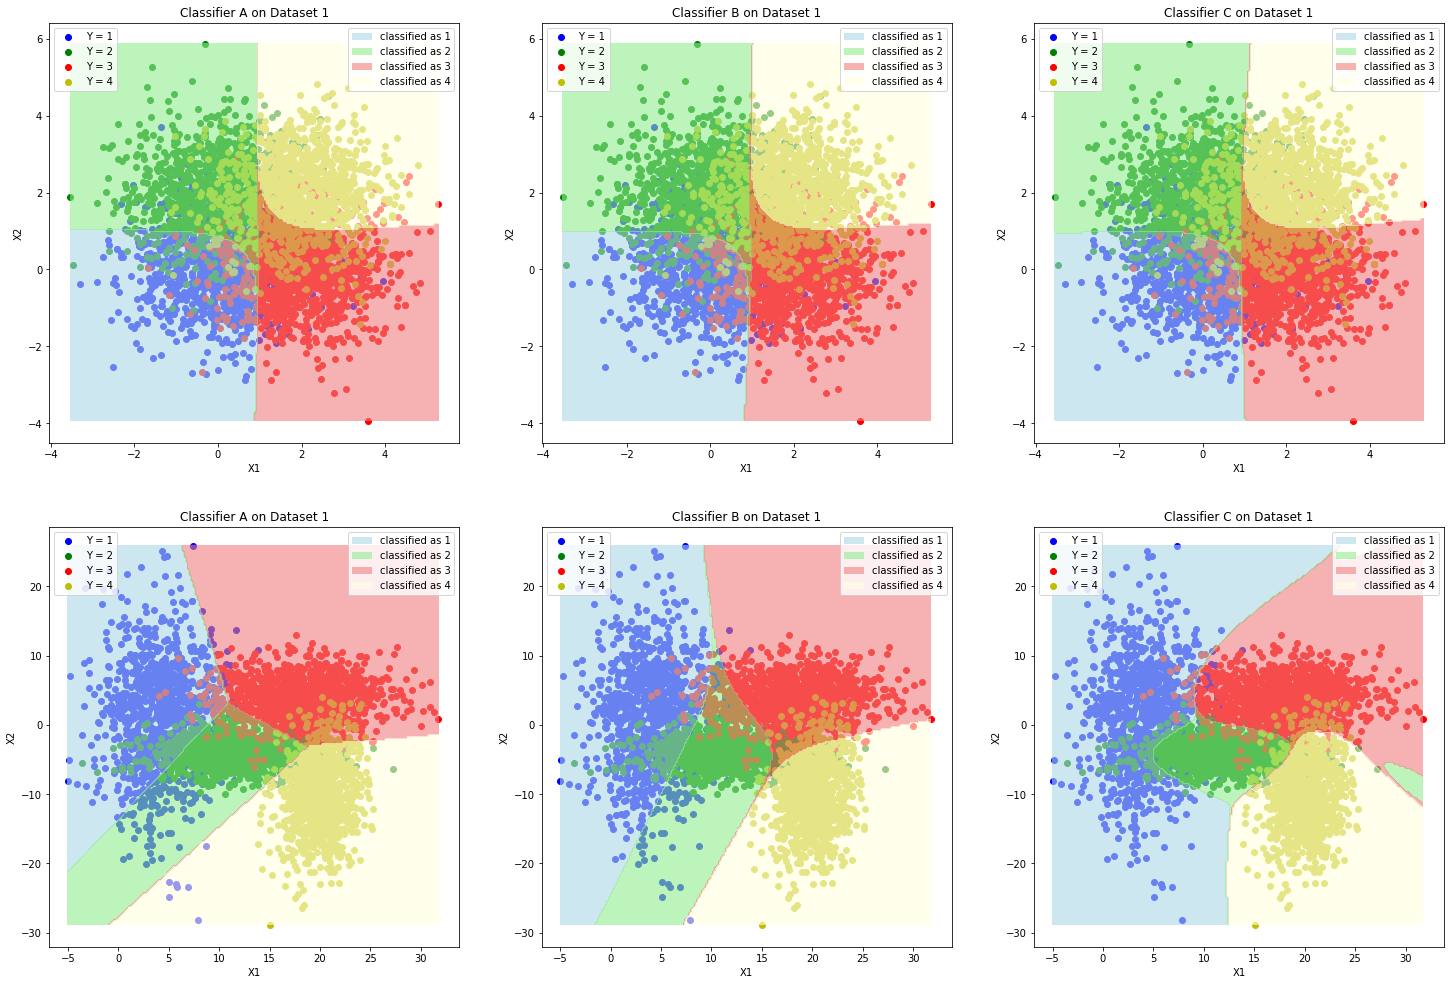

In [0]:
# Cell type : CodeWrite
# write the code for loading the data, running the three algos, and plotting here. 
# (Use the functions written previously.)
L=np.array([[0,1,2,3],[1,0,1,2],[2,1,0,1],[3,2,1,0]])
X_train1 = np.load('dataset2_1/arr_0.npy')
Y_train1 = np.load('dataset2_1/arr_1.npy')
X_test1  = np.load('dataset2_1/arr_2.npy')
Y_test1  = np.load('dataset2_1/arr_3.npy')
X_train2 = np.load('dataset2_2/arr_0.npy')
Y_train2 = np.load('dataset2_2/arr_1.npy')
X_test2  = np.load('dataset2_2/arr_2.npy')
Y_test2  = np.load('dataset2_2/arr_3.npy')

Y_pred_test_1a_1 = Bayes2a(X_train1, Y_train1, X_test1)
Y_pred_test_1b_1 = Bayes2b(X_train1, Y_train1, X_test1)
Y_pred_test_1c_1 = Bayes2c(X_train1, Y_train1, X_test1)

Y_pred_test_1a_2 = Bayes2a(X_train2, Y_train2, X_test2)
Y_pred_test_1b_2 = Bayes2b(X_train2, Y_train2, X_test2)
Y_pred_test_1c_2 = Bayes2c(X_train2, Y_train2, X_test2)

error[0][0] = len(np.where(Y_pred_test_1a_1 != Y_test1)[0])/(len(Y_test1))
error[0][1] = len(np.where(Y_pred_test_1b_1 != Y_test1)[0])/(len(Y_test1))
error[0][2] = len(np.where(Y_pred_test_1c_1 != Y_test1)[0])/(len(Y_test1))
error[1][0] = len(np.where(Y_pred_test_1a_2 != Y_test2)[0])/(len(Y_test2))
error[1][1] = len(np.where(Y_pred_test_1b_2 != Y_test2)[0])/(len(Y_test2))
error[1][2] = len(np.where(Y_pred_test_1c_2 != Y_test2)[0])/(len(Y_test2))



c1=np.zeros(shape=(4,4))
c2=np.zeros(shape=(4,4))
c3=np.zeros(shape=(4,4))
c4=np.zeros(shape=(4,4))
c5=np.zeros(shape=(4,4))
c6=np.zeros(shape=(4,4))

for i in range(Y_pred_test_1a_1.shape[0]):
    c1[int(Y_pred_test_1a_1[i])-1,int(Y_test1[i])-1]+=1
for i in range(Y_pred_test_1b_1.shape[0]):
    c2[int(Y_pred_test_1b_1[i])-1,int(Y_test1[i])-1]+=1
for i in range(Y_pred_test_1c_1.shape[0]):
    c3[int(Y_pred_test_1c_1[i])-1,int(Y_test1[i])-1]+=1

for i in range(Y_pred_test_1a_2.shape[0]):
    c4[int(Y_pred_test_1a_2[i])-1,int(Y_test2[i])-1]+=1
for i in range(Y_pred_test_1b_2.shape[0]):
    c5[int(Y_pred_test_1b_2[i])-1,int(Y_test2[i])-1]+=1
for i in range(Y_pred_test_1c_1.shape[0]):
    c6[int(Y_pred_test_1c_2[i])-1,int(Y_test2[i])-1]+=1




x1 = np.linspace(np.min(X_train1.T[0]),np.max(X_train1.T[0]),200)
x2 = np.linspace(np.min(X_train1.T[1]),np.max(X_train1.T[1]),200)
x1,x2 = np.meshgrid(x1,x2)
x1 = x1.reshape((200*200,1))
x2 = x2.reshape((200*200,1))
x = np.concatenate((x1,x2),axis=1)
X1 =x1.reshape((200,200))
X2 =x2.reshape((200,200))

z1 = Bayes2a(X_train1,Y_train1,x)
z2 = Bayes2b(X_train1,Y_train1,x)
z3 = Bayes2c(X_train1,Y_train1,x)

z1 = z1.reshape((200,200))
z2 = z2.reshape((200,200))
z3 = z3.reshape((200,200))
z = [z1, z2, z3]
plt.figure(figsize = (25,17))
titles = ["A", "B", "C"]
for i in range(3):
  plt.subplot(2,3,i+1)
  plt.gca().set_title("Classifier " + titles[i] + " on Dataset 1")
  plt.gca().set_ylabel("X2")
  plt.gca().set_xlabel("X1")

  plt.scatter(X_train1[Y_train1==1].T[0], X_train1[Y_train1==1].T[1], c="b", label = "Y = 1")
  plt.scatter(X_train1[Y_train1==2].T[0], X_train1[Y_train1==2].T[1], c="g", label = "Y = 2")
  plt.scatter(X_train1[Y_train1==3].T[0], X_train1[Y_train1==3].T[1], c="r", label = "Y = 3")
  plt.scatter(X_train1[Y_train1==4].T[0], X_train1[Y_train1==4].T[1], c="y", label = "Y = 4")
  contour = plt.legend(loc = "upper left")
  a = plt.contourf(X1,X2,z[i], levels = [0, 1, 2, 3,4], colors = ["lightblue", "lightgreen", "lightcoral", "lightyellow"], alpha = 0.6)
  proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in a.collections]
  plt.legend(proxy, ["classified as " + str(i+1) for i in range(4)], loc = "upper right")    
  plt.gca().add_artist(contour)


x1 = np.linspace(np.min(X_train2.T[0]),np.max(X_train2.T[0]),200)
x2 = np.linspace(np.min(X_train2.T[1]),np.max(X_train2.T[1]),200)
x1,x2 = np.meshgrid(x1,x2)
x1 = x1.reshape((200*200,1))
x2 = x2.reshape((200*200,1))
x = np.concatenate((x1,x2),axis=1)
X1 =x1.reshape((200,200))
X2 =x2.reshape((200,200))

z1 = Bayes2a(X_train2,Y_train2,x)
z2 = Bayes2b(X_train2,Y_train2,x)
z3 = Bayes2c(X_train2,Y_train2,x)

z1 = z1.reshape((200,200))
z2 = z2.reshape((200,200))
z3 = z3.reshape((200,200))

z = [z1, z2, z3]
for i in range(3):
  plt.subplot(2,3,i+4)
  plt.gca().set_title("Classifier " + titles[i] + " on Dataset 1")
  plt.gca().set_ylabel("X2")
  plt.gca().set_xlabel("X1")

  plt.scatter(X_train2[Y_train2==1].T[0], X_train2[Y_train2==1].T[1], c="b", label = "Y = 1")
  plt.scatter(X_train2[Y_train2==2].T[0], X_train2[Y_train2==2].T[1], c="g", label = "Y = 2")
  plt.scatter(X_train2[Y_train2==3].T[0], X_train2[Y_train2==3].T[1], c="r", label = "Y = 3")
  plt.scatter(X_train2[Y_train2==4].T[0], X_train2[Y_train2==4].T[1], c="y", label = "Y = 4")
  contour = plt.legend(loc = "upper left")
  a = plt.contourf(X1,X2,z[i], levels = [0, 1, 2, 3,4], colors = ["lightblue", "lightgreen", "lightcoral", "lightyellow"], alpha = 0.6)
  proxy = [plt.Rectangle((0,0),1,1,fc = pc.get_facecolor()[0]) for pc in a.collections]
  plt.legend(proxy, ["classified as " + str(i+1) for i in range(4)], loc = "upper right")    
  plt.gca().add_artist(contour)



# ** Cell type : TextWrite ** 
(Write your observations and table of errors here)

### Confusion Matrices

| trainset1\classifier a | 1   | 2   | 3   |  4  | trainset1\classifier b | 1   | 2   | 3   | 4   | trainset1\classifier c | 1   | 2   | 3   | 4   |
|------------------------|-----|-----|-----|-----|------------------------|-----|-----|-----|-----|------------------------|-----|-----|-----|-----|
| 1                      | 633 | 219 | 136 | 12  | 1                      | 633 | 218 | 137 | 12  | 1                      | 634 | 217 | 138 | 11  |
| 2                      | 97  | 738 | 62  | 103 | 2                      | 95  | 743 | 60  | 102 | 2                      | 99 | 742 | 61  | 98 |
| 3                      | 86  | 49  | 770 | 95  | 3                      | 84  | 49  | 773 | 94  | 3                      | 87  | 47  | 772 | 94  |
| 4                      | 15  | 136 | 194 | 655 | 4                      | 16  | 137 | 196 | 651 | 4                      | 15  | 134 | 201 | 650 |

| trainset2\classifier a| 1   | 2   | 3   | 4   | trainset2\classifier b| 1  | 2  | 3   | 4     | trainset2\classifier c| 1   | 2  | 3   | 4   |
|-----------------------|-----|-----|-----|-----|-----------------------|-----|-----|-----|-----|-----------------------|-----|-----|-----|-----|
| 1                     | 830 | 150 | 18  | 2   | 1                     | 891 | 106 | 3   | 0   | 1                     | 901 | 80 | 19  | 0   |
| 2                     | 93  | 784 | 46  | 77  | 2                     | 119 | 691 | 124 | 66  | 2                     | 64  | 824 | 46  | 66  |
| 3                     | 30  | 61  | 905 | 4   | 3                     | 23  | 106 | 864 | 7   | 3                     | 19  | 31  | 936 | 14  |
| 4                     | 0   | 23  | 78  | 899 | 4                     | 0   | 5   | 102 | 893 | 4                     | 0   | 36  | 48  | 916 |

### Expected loss
  
| dataset\classifier | a       | b      | c       |
|--------------------|---------|--------|---------|
| 1                  | 0.42975 | 0.429  | 0.42775 |
| 2                  | 0.1835  | 0.1895 | 0.14075 |

### Misclassification Matrix

| dataset\classifier | a       | b      | c       |
|--------------------|---------|--------|---------|
| 1                  | 0.301   | 0.3    | 0.3005  |
| 2                  | 0.1455  | 0.16525| 0.10575 |

### Observations
* On average c performs better than b which performs better than a
* Unlike Q1 there are no longer linear boundaries this time because of the loss matrix and higher classification number
* We also see that classifier c can seperate non linear data quite well by looking at the graph for the second dataset for class 2


**Cell type : TextRead **

# Problem 3 : Bias-Variance analysis in regression

Do bias variance analysis for the following setting: 

$X \sim Unif([-1,1]\times[-1,1])$

$Y=\exp(-4*||X-a||^2) + \exp(-4*||X-b||^2) + \exp(-4*||X-c||^2)$

where $a=[0.5,0.5], b=[-0.5,-0.5], c=[0.5, -0.5]$.

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

Sample 50 (X,Y) points from above distribution, and do ridge regularised polynomial regression with degrees=[1,2,4,8,16] and regularisation parameters ($\lambda$) = [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]. Repeat for 100 times, and estimate the bias and variance for all 5*6=30 algorithms. You may approximate the distribution over X by discretising the $[-1,1]\times[-1,1]$ space into 10000 points. (Both expectations over S and (x,y) are simply estimates due to the finiteness of our experiments and sample)
 
3a) For each of the 30 algorithms analyse the contour plot of the estimated $f_S$ for 3 different training sets. And the average $g(x) = E_S [f_S(x)]$. Write one function for doing everything in the code cell below. So, there are total of 5*6 plots, with each plot containing 4 sub-plots. Give appropriate titles and colorbars.

3b) In the next text cell, give the Bias and Variance computed as a 5x6 matrix, appropriately label the rows and columns. And give your conclusion in one or two sentences. 




<Figure size 432x288 with 0 Axes>

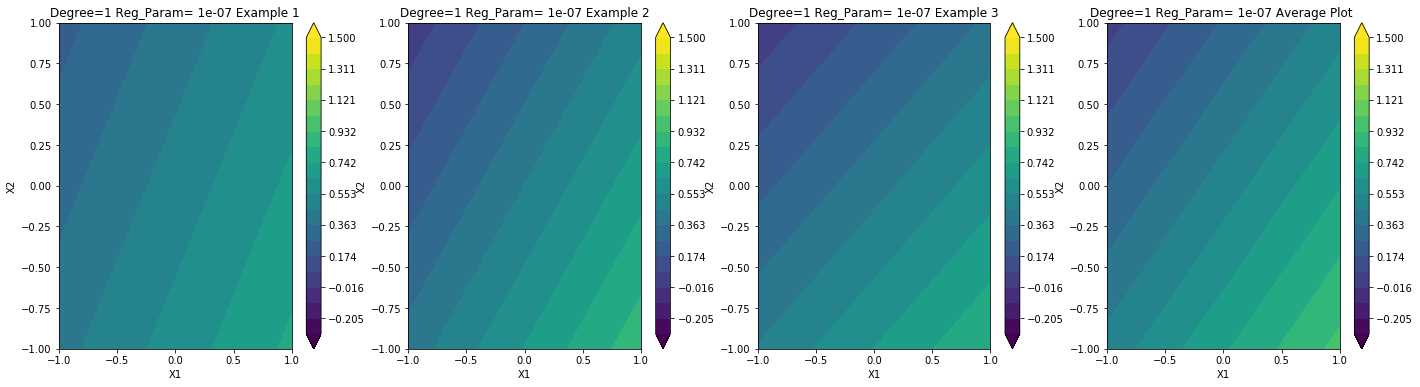

Degree= 1 lambda= 1e-07
Bias = 0.05401748740279964
Variance = 0.004107534466625676
MSE = 0.058125021869425315


<Figure size 432x288 with 0 Axes>

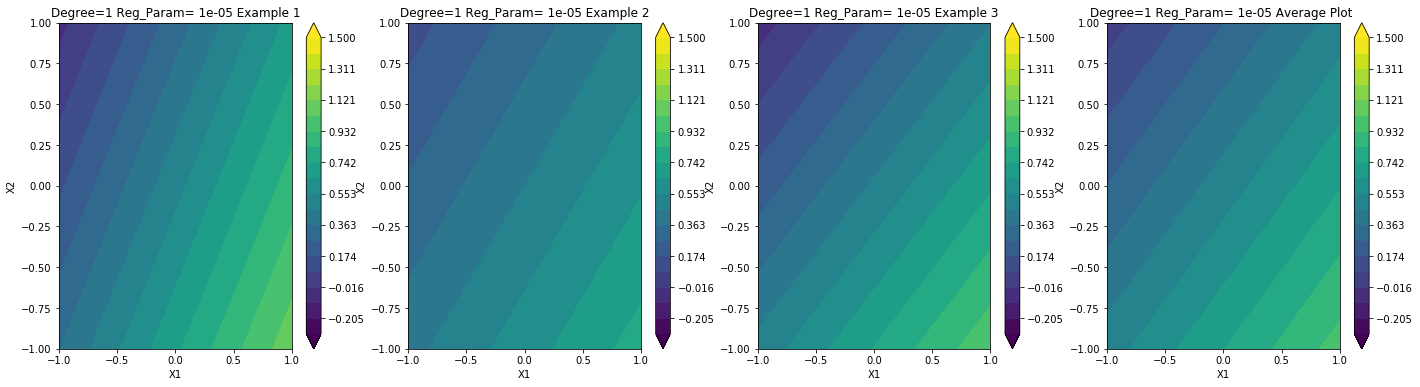

Degree= 1 lambda= 1e-05
Bias = 0.0541341950596877
Variance = 0.0038094348222684634
MSE = 0.057943629881956164


<Figure size 432x288 with 0 Axes>

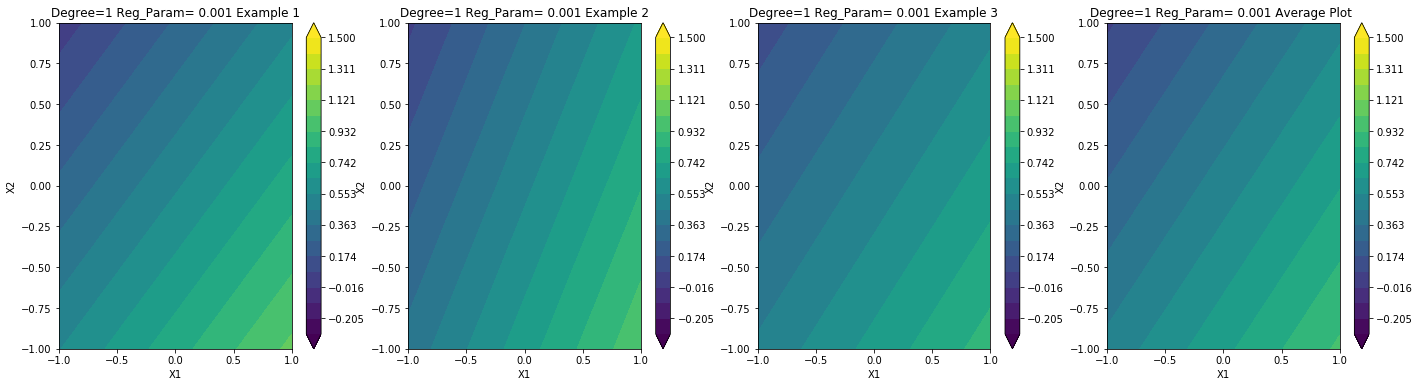

Degree= 1 lambda= 0.001
Bias = 0.053997039708968075
Variance = 0.003309053896609781
MSE = 0.057306093605577854


<Figure size 432x288 with 0 Axes>

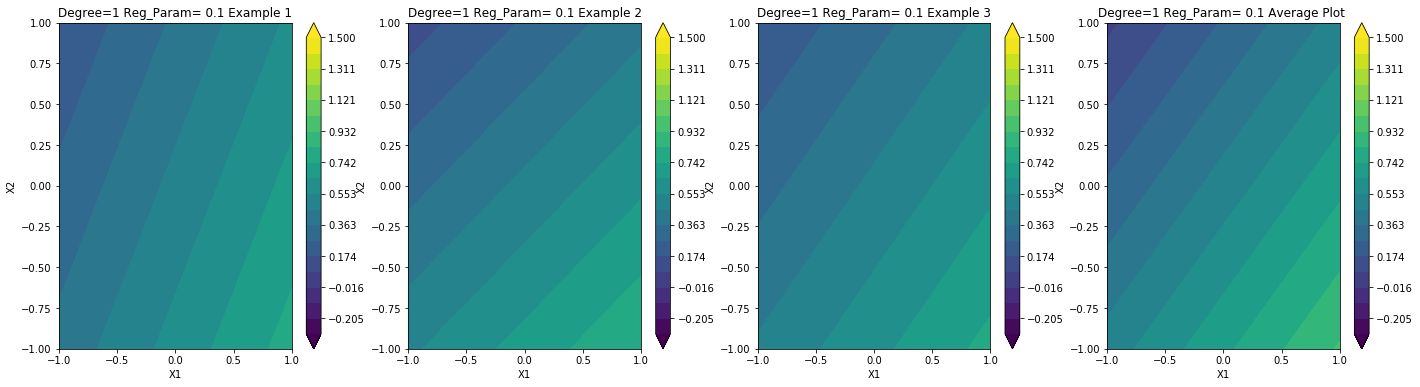

Degree= 1 lambda= 0.1
Bias = 0.05401102471729891
Variance = 0.004002511823671599
MSE = 0.05801353654097051


<Figure size 432x288 with 0 Axes>

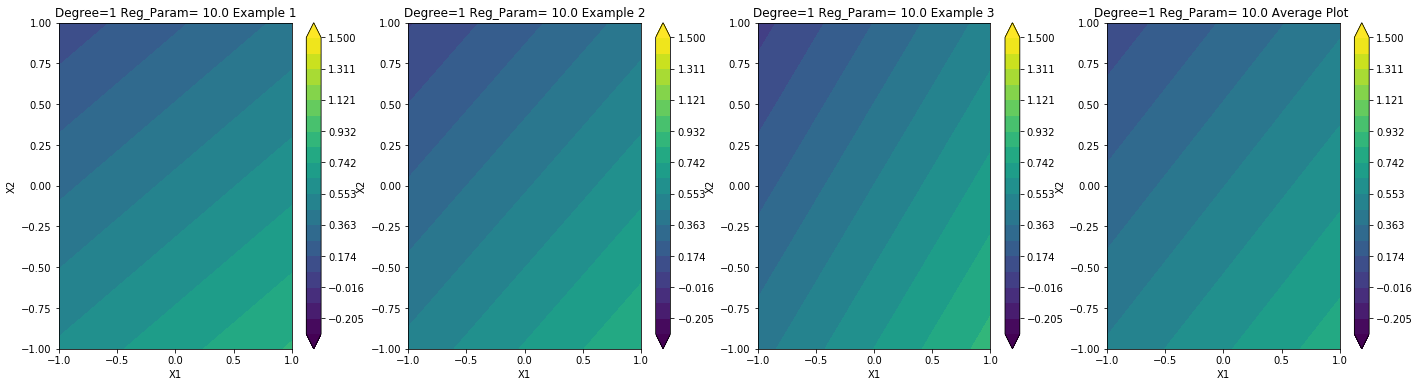

Degree= 1 lambda= 10.0
Bias = 0.05781629183509101
Variance = 0.0023129983361058373
MSE = 0.06012929017119684


<Figure size 432x288 with 0 Axes>

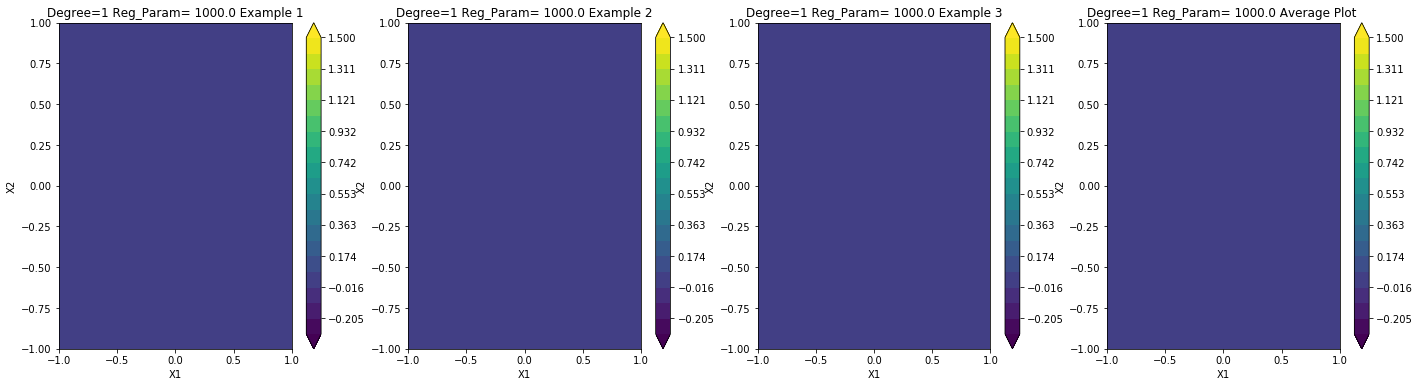

Degree= 1 lambda= 1000.0
Bias = 0.2912635481609679
Variance = 2.7629955356183184e-05
MSE = 0.29129117811632405


<Figure size 432x288 with 0 Axes>

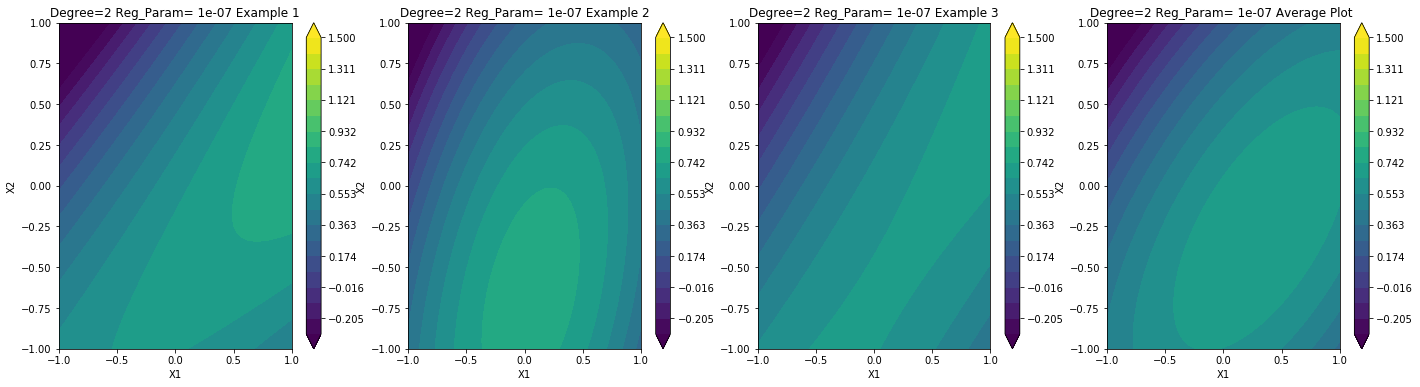

Degree= 2 lambda= 1e-07
Bias = 0.03405142858387134
Variance = 0.005164291243494191
MSE = 0.03921571982736553


<Figure size 432x288 with 0 Axes>

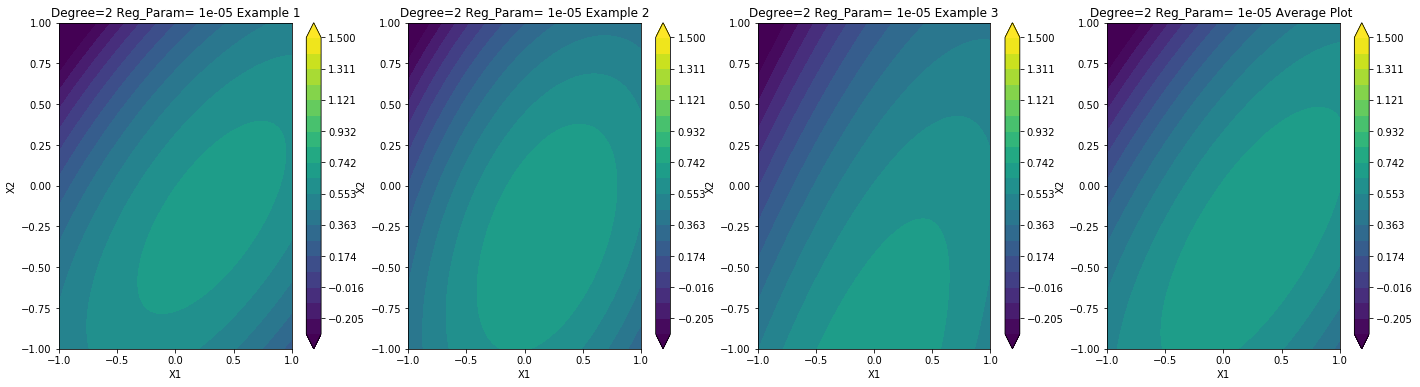

Degree= 2 lambda= 1e-05
Bias = 0.034192259489221284
Variance = 0.005604335528238196
MSE = 0.03979659501745948


<Figure size 432x288 with 0 Axes>

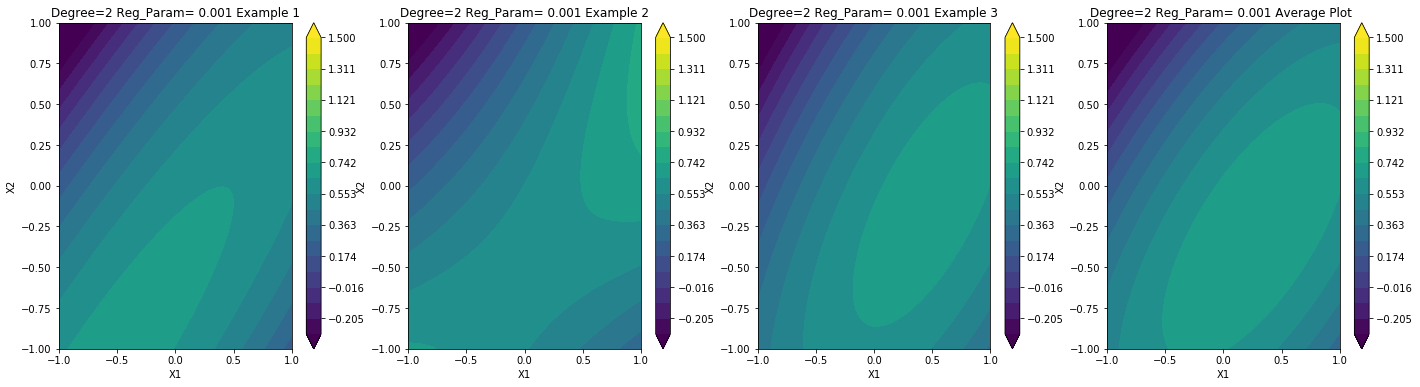

Degree= 2 lambda= 0.001
Bias = 0.03423200817151619
Variance = 0.006017577276154158
MSE = 0.04024958544767035


<Figure size 432x288 with 0 Axes>

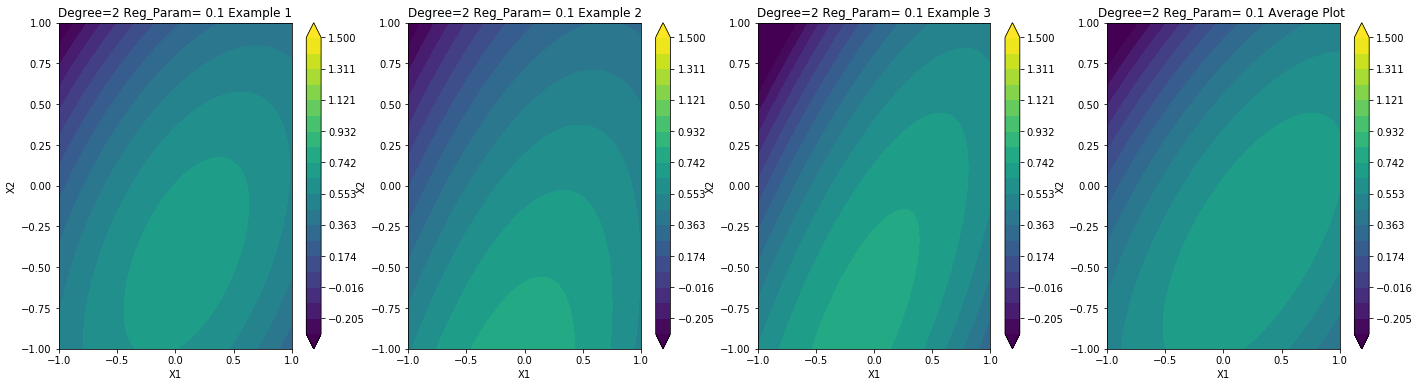

Degree= 2 lambda= 0.1
Bias = 0.03414028836618469
Variance = 0.005141977103862488
MSE = 0.03928226547004718


<Figure size 432x288 with 0 Axes>

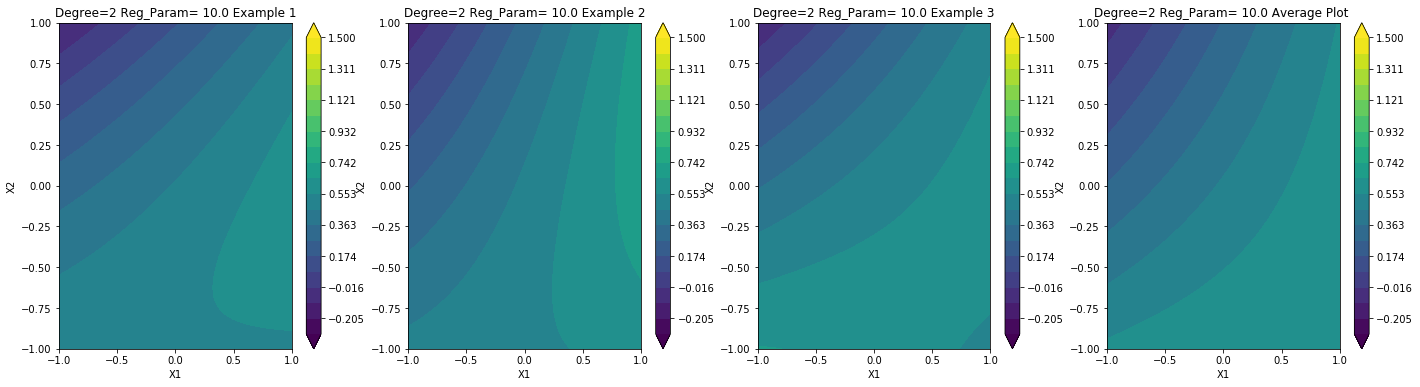

Degree= 2 lambda= 10.0
Bias = 0.048975666290052615
Variance = 0.002243882250284927
MSE = 0.05121954854033754


<Figure size 432x288 with 0 Axes>

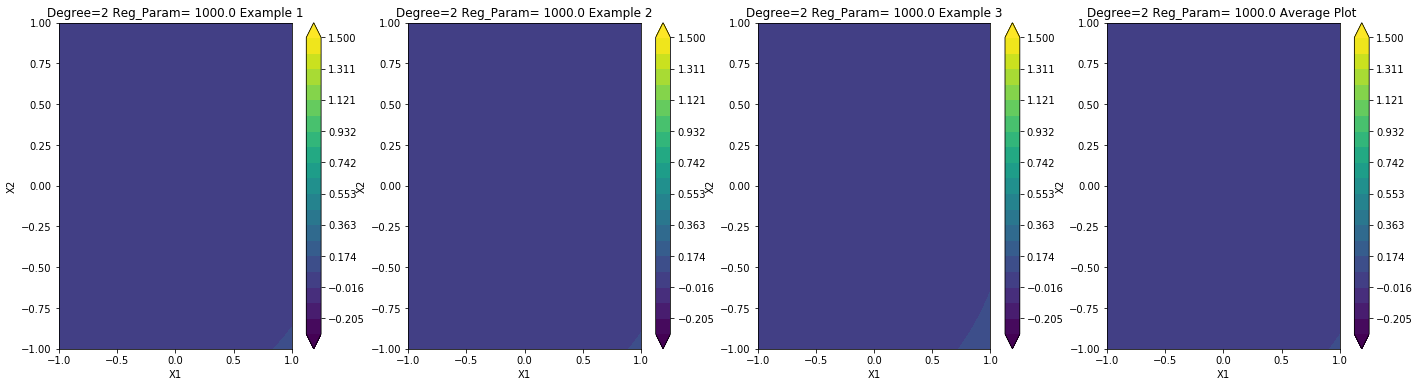

Degree= 2 lambda= 1000.0
Bias = 0.28519852038885524
Variance = 3.0519269479941376e-05
MSE = 0.2852290396583352


<Figure size 432x288 with 0 Axes>

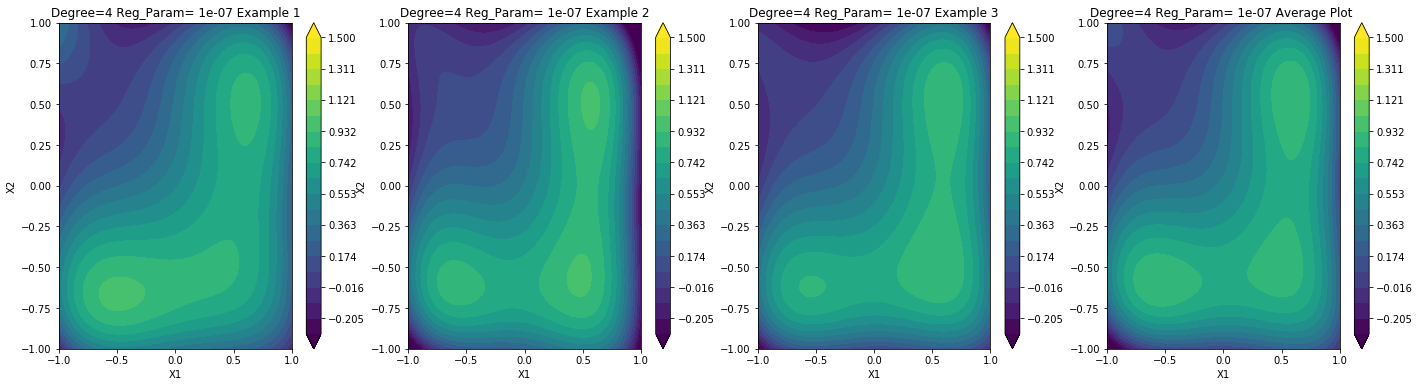

Degree= 4 lambda= 1e-07
Bias = 0.007541262983939537
Variance = 0.008486791842703357
MSE = 0.016028054826642893


<Figure size 432x288 with 0 Axes>

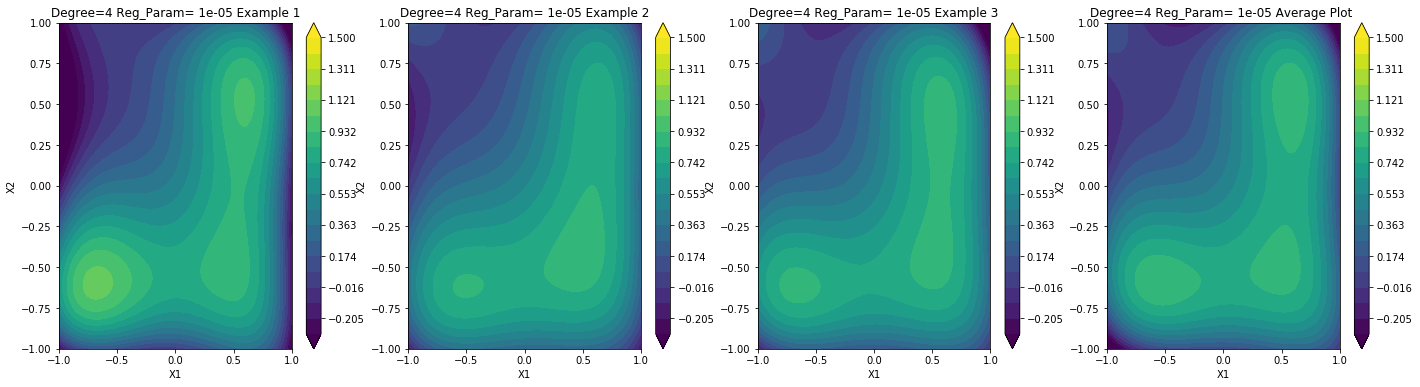

Degree= 4 lambda= 1e-05
Bias = 0.007586823446023463
Variance = 0.0073193413730798865
MSE = 0.01490616481910335


<Figure size 432x288 with 0 Axes>

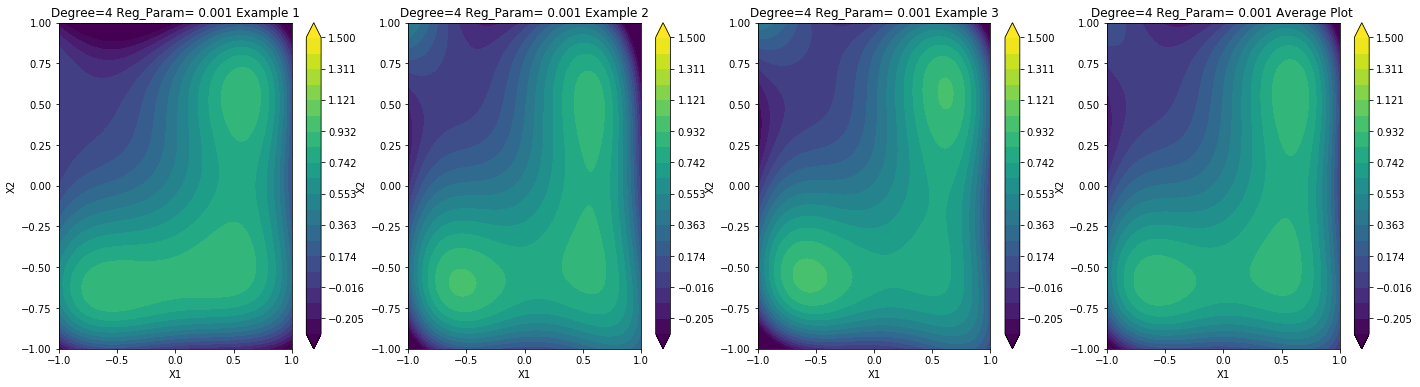

Degree= 4 lambda= 0.001
Bias = 0.006959415377863791
Variance = 0.009166348955848532
MSE = 0.016125764333712322


<Figure size 432x288 with 0 Axes>

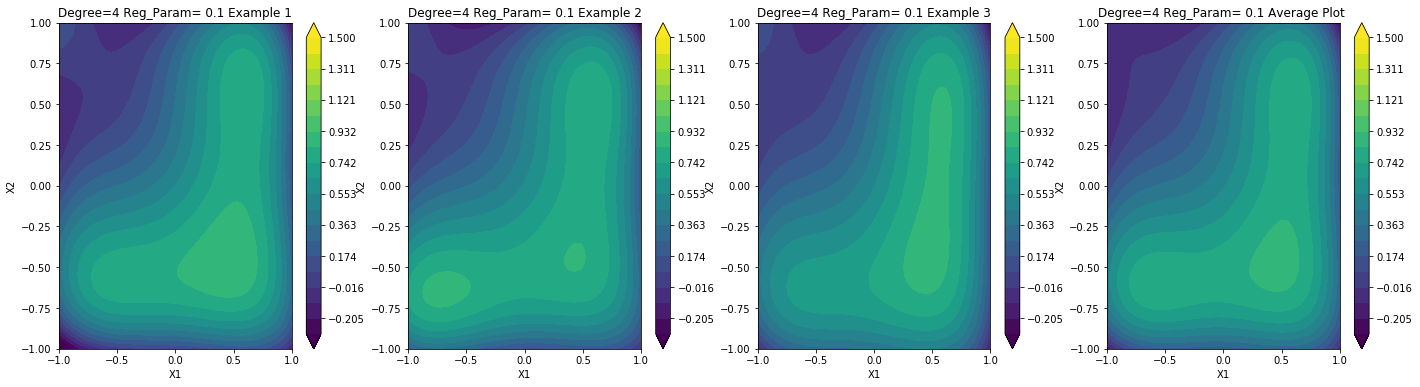

Degree= 4 lambda= 0.1
Bias = 0.007099183610787759
Variance = 0.003540702865116577
MSE = 0.010639886475904336


<Figure size 432x288 with 0 Axes>

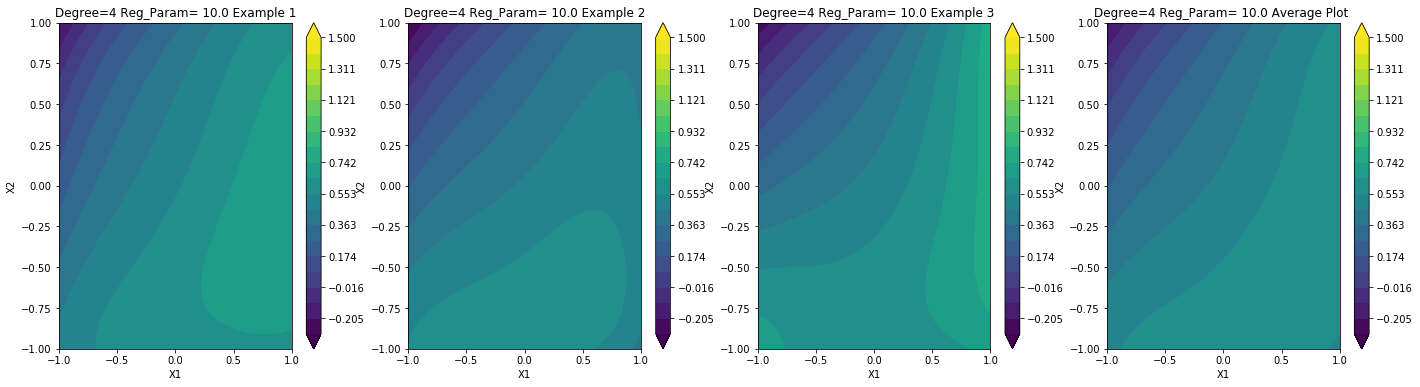

Degree= 4 lambda= 10.0
Bias = 0.044628490635468
Variance = 0.002921060656728013
MSE = 0.04754955129219601


<Figure size 432x288 with 0 Axes>

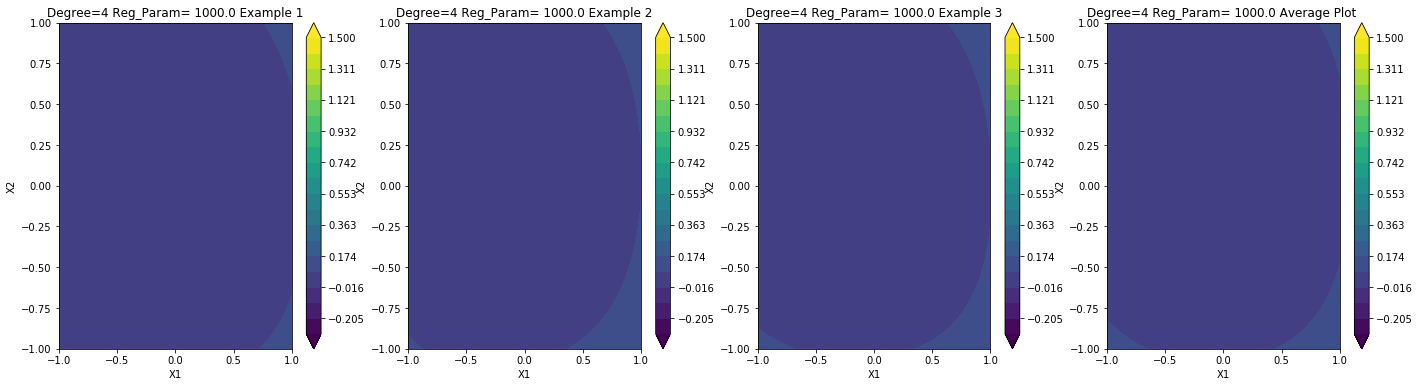

Degree= 4 lambda= 1000.0
Bias = 0.2833667167359446
Variance = 3.691788043217657e-05
MSE = 0.2834036346163768


<Figure size 432x288 with 0 Axes>

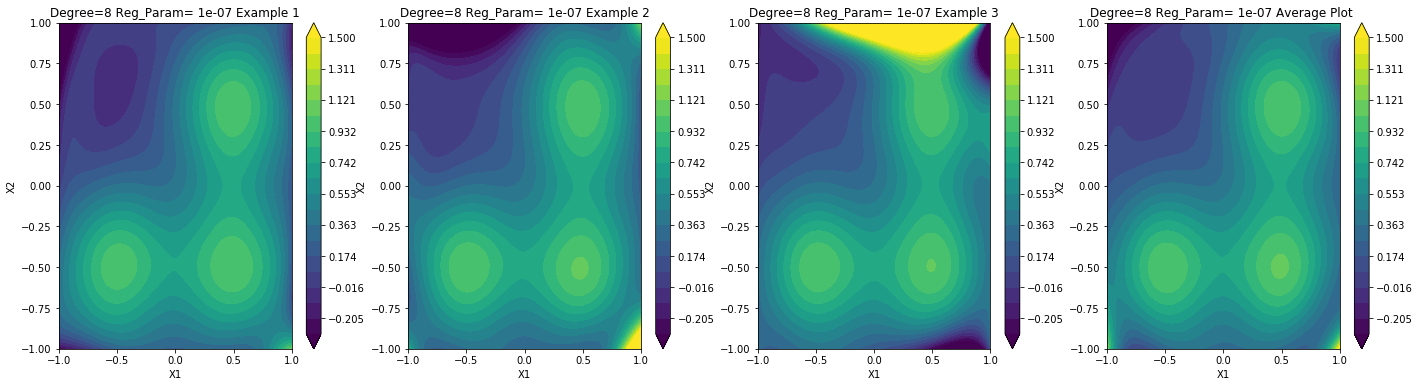

Degree= 8 lambda= 1e-07
Bias = 0.0075025400492491215
Variance = 0.19787422697874438
MSE = 0.2053767670279935


<Figure size 432x288 with 0 Axes>

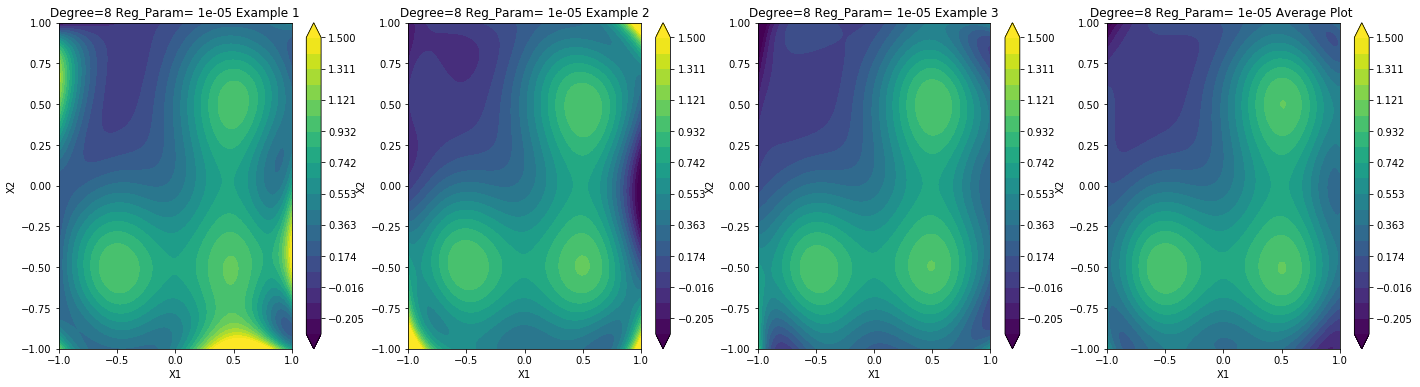

Degree= 8 lambda= 1e-05
Bias = 0.0019473351000033358
Variance = 0.04262340351648551
MSE = 0.044570738616488845


<Figure size 432x288 with 0 Axes>

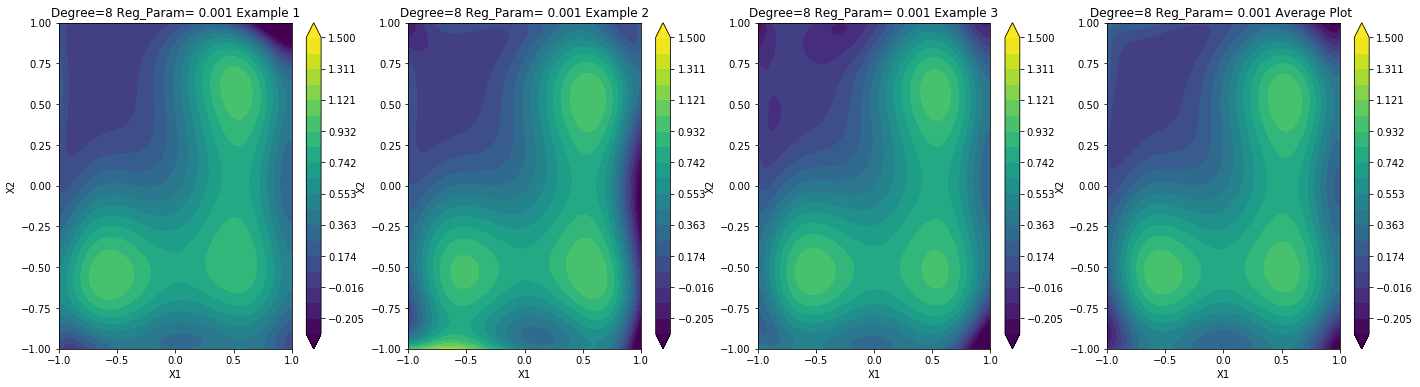

Degree= 8 lambda= 0.001
Bias = 0.004632661309055326
Variance = 0.02072076202090303
MSE = 0.025353423329958356


<Figure size 432x288 with 0 Axes>

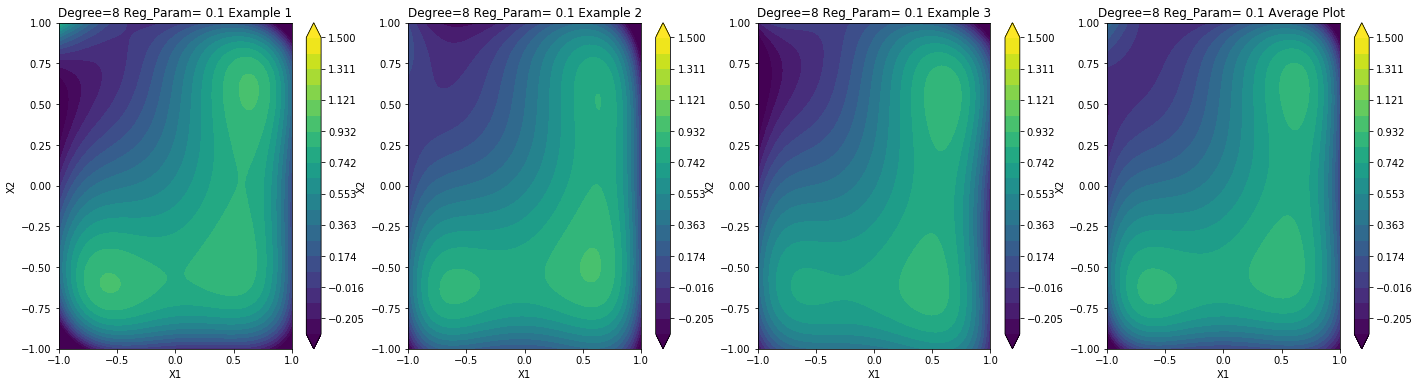

Degree= 8 lambda= 0.1
Bias = 0.008985570301578856
Variance = 0.007613769695228034
MSE = 0.01659933999680689


<Figure size 432x288 with 0 Axes>

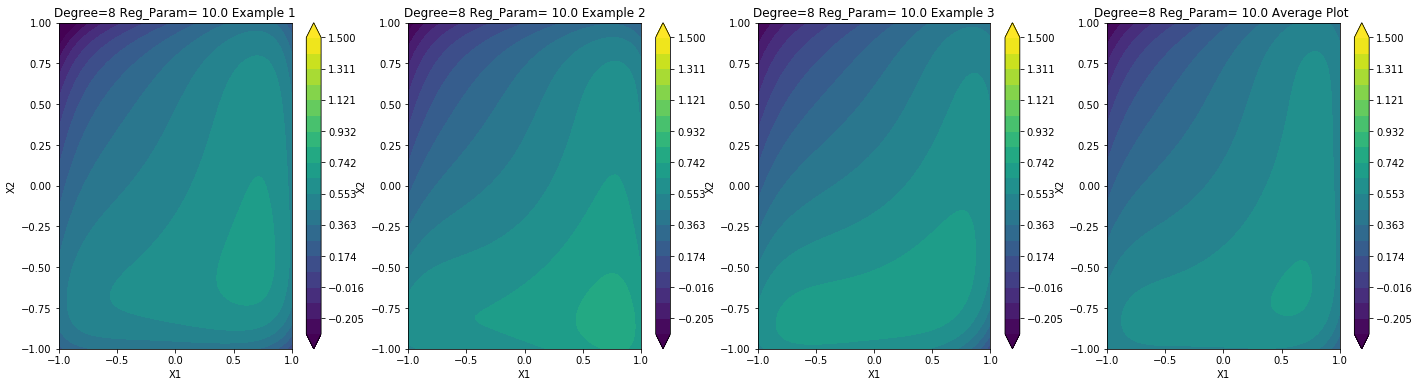

Degree= 8 lambda= 10.0
Bias = 0.03945690302995557
Variance = 0.002954893684290693
MSE = 0.04241179671424626


<Figure size 432x288 with 0 Axes>

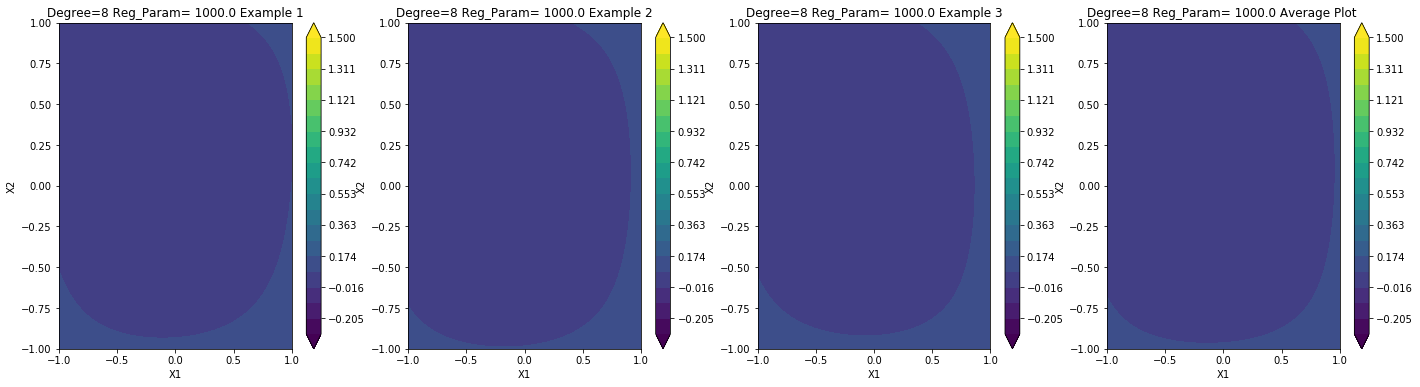

Degree= 8 lambda= 1000.0
Bias = 0.28132254411197666
Variance = 5.300443777864638e-05
MSE = 0.2813755485497553


<Figure size 432x288 with 0 Axes>

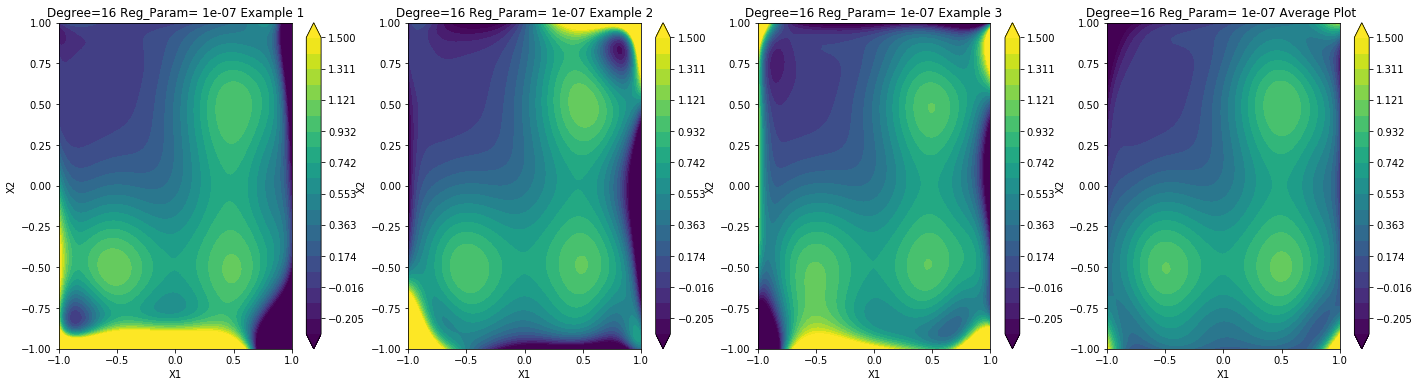

Degree= 16 lambda= 1e-07
Bias = 0.013510354468547868
Variance = 0.2738316026191589
MSE = 0.28734195708770677


<Figure size 432x288 with 0 Axes>

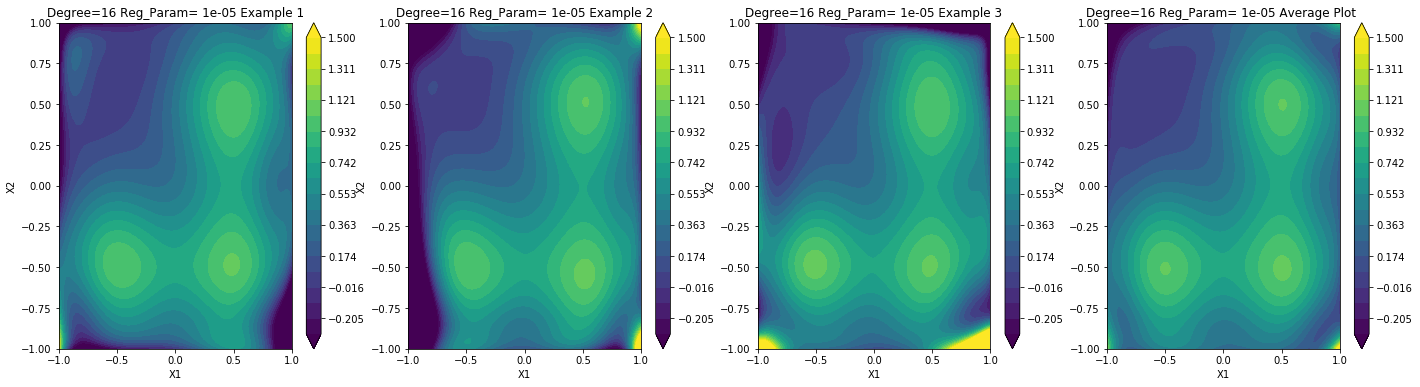

Degree= 16 lambda= 1e-05
Bias = 0.009991956575641062
Variance = 0.15439321324421887
MSE = 0.16438516981985993


<Figure size 432x288 with 0 Axes>

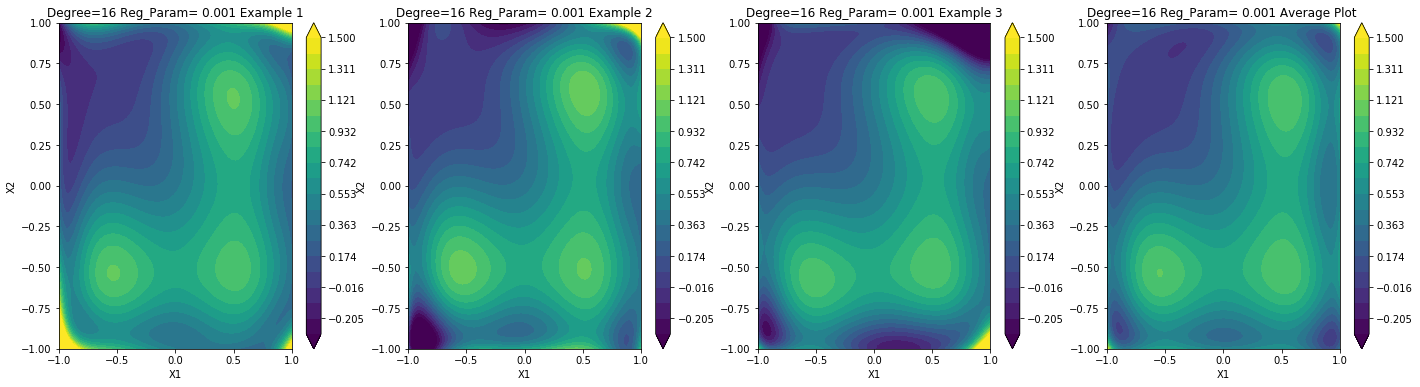

Degree= 16 lambda= 0.001
Bias = 0.004855919783245505
Variance = 0.06426779233100191
MSE = 0.06912371211424742


<Figure size 432x288 with 0 Axes>

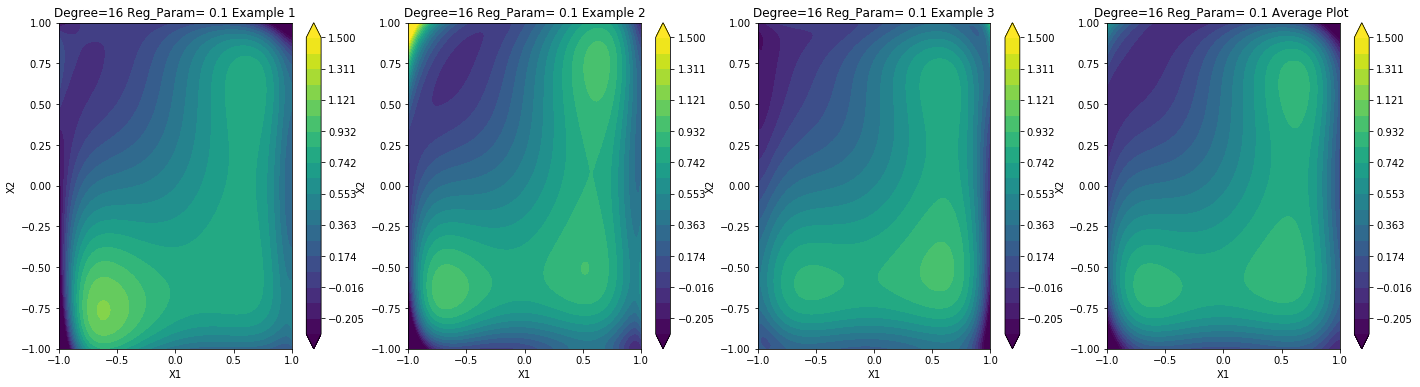

Degree= 16 lambda= 0.1
Bias = 0.010850870795088188
Variance = 0.013798324381375689
MSE = 0.024649195176463877


<Figure size 432x288 with 0 Axes>

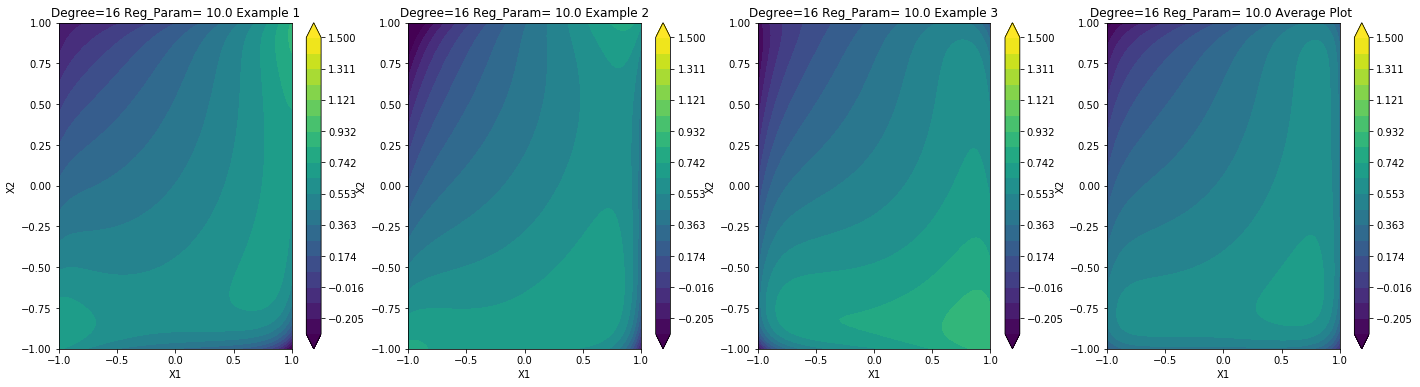

Degree= 16 lambda= 10.0
Bias = 0.03762690402815958
Variance = 0.0031123016273623847
MSE = 0.040739205655521964


<Figure size 432x288 with 0 Axes>

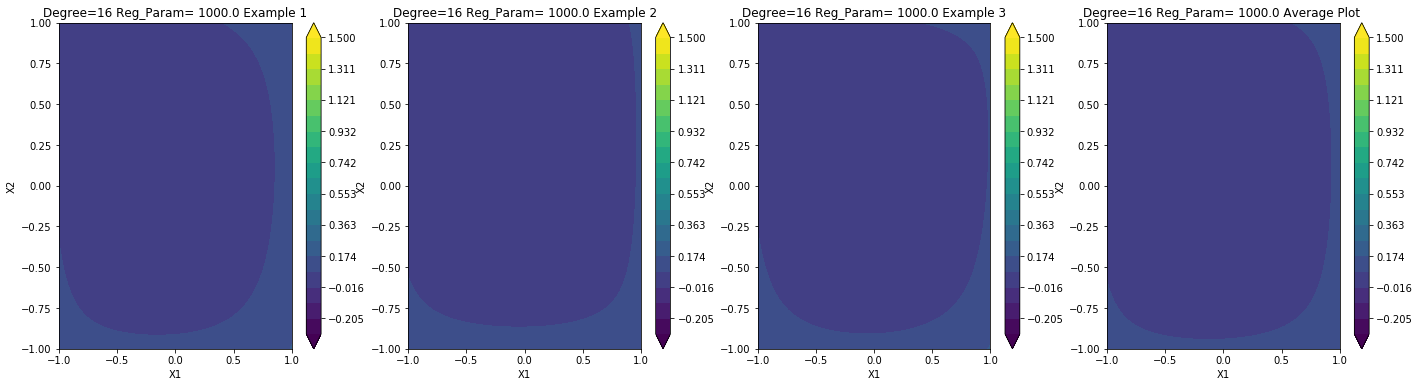

Degree= 16 lambda= 1000.0
Bias = 0.2815042141271248
Variance = 5.0392664051283235e-05
MSE = 0.28155460679117605


In [0]:
# Cell type : CodeWrite

def polynomial_regression_ridge_pred(X_test, wt_vector, degree):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    f = np.ones(len(X_test))
    for j in range(1,degree+1):
        for k in range(0,j+1):
            f=np.vstack((f,(X_test.T)[0]**k * (X_test.T)[1]**(j-k)))
    ans = np.matmul(f.T, wt_vector)
    return ans
    
def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))

    # Get Z using other functions
    X1 = X.reshape((100*100,1))
    Y1 = Y.reshape((100*100,1))
    X_test = np.concatenate((X1,Y1),axis=1)
    Z = polynomial_regression_ridge_pred(X_test, wt_vector, degree)
    Z = Z.reshape((100,100))
    
    plt.contourf(X,Y,Z,levels=np.linspace(-0.3,1.5,20), extend='both')
    plt.gca().set_title("Degree="+str(degree)+title)
    plt.gca().set_ylabel("X2")
    plt.gca().set_xlabel("X1")
    plt.colorbar()
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    f = np.ones(len(X_train))
    for j in range(1,degree+1):
        for k in range(0,j+1):
            ta = np.transpose(X_train)[0]**k * np.transpose(X_train)[1]**(j-k)
            f  = np.vstack((f,ta))
    
    f=f.T
    ftf=np.matmul(f.T,f)
    reg_param/=2
    ide=np.identity(len(ftf))
    ide=ide*reg_param
    ide =ide+ftf
    
    ans= np.matmul(np.linalg.inv(ide), np.matmul(f.T, Y_train))
    return ans
                   
def compute_BV_error_sample_plot(degree, reg_param, num_training_samples=50):
    
    """Write code for generating data, fitting polynomial for given degree and reg_param. 
    Use num_training_samples samples for training.
        
    Compute the $f_S$ of 100 runs. 

    Plot 3 examples of learned function to illustrate how learned function varies 
    with different training samples. Also plot the average $f_S$ of all 100 runs.
    
    In total 4 subplots in one plot with appropriate title including degree and lambda value.
    
    Fill code to compute bias and variance, and average mean square error using the computed 100 $f_S$ functions.
    
    All contourplots are to be drawn with levels=np.linspace(0,1.2,20)
    
    Also return bias, variance, mean squared error. """
    
    avg_w = np.zeros(())
    al=np.arange(10000)
    x=(al//100)/50-1
    x1=(al%100)/50-1
    x = np.vstack((x,x1))
    x=x.T
    
    y=np.zeros(10000)
    a=[0.5,0.5]
    b=[-0.5,-0.5]
    c=[0.5,-0.5] 
    y=np.exp(-4*np.sum((x-a)*(x-a), axis=1))+np.exp(-4*np.sum((x-b)*(x-b), axis=1))+np.exp(-4*np.sum((x-c)*(x-c), axis=1))
    
    siw=np.zeros(())
    ally=np.ndarray((100,10000))
    plt.figure(figsize = ( 24,6 ) )
    
    for i in range(100):
        x_train = np.random.uniform(-1,1,num_training_samples)
        x1_train = np.random.uniform(-1,1,num_training_samples)
        x_train = np.vstack((x_train,x1_train))
        x_train=x_train.T
        
        y_train=np.exp(-4*np.sum((x_train-a)*(x_train-a), axis=1))+np.exp(-4*np.sum((x_train-b)*(x_train-b), axis=1))+np.exp(-4*np.sum((x_train-c)*(x_train-c), axis=1))    
        w=polynomial_regression_ridge_train(x_train,y_train,degree,reg_param)
        
        siw=siw + w
        ally[i]=polynomial_regression_ridge_pred(x,w,degree)
        if(i>96):
            plt.subplot(1,4,i-96)
            visualise_polynomial_2d(w,degree," Reg_Param= "+str(reg_param)+" Example "+str(i-96))
    
    siw/=100
    AvgPred=polynomial_regression_ridge_pred(x, siw,degree)
    red=y-AvgPred
    red1=ally-AvgPred
    #print(red1.shape)
    bias=np.mean(red*red)
    variance=np.mean(red1*red1)
    mse=bias+variance
    
    plt.subplot(1,4,4)
    visualise_polynomial_2d(siw,degree," Reg_Param= "+str(reg_param)+" Average Plot ")
    plt.show()
    
    return bias, variance, mse

alb=np.ndarray(shape=(5,6))
alv=np.ndarray(shape=(5,6))
alm=np.ndarray(shape=(5,6))
i=0
for degree in [1,2,4,8,16]:
    j=0
    for reg_param in [1e-7, 1e-5, 1e-3, 1e-1, 1e1, 1e3]:
        plt.figure()
        b,v,e = compute_BV_error_sample_plot(degree, reg_param)
        
        print('================================')
        print('Degree= '+str(degree)+' lambda= '+str(reg_param))
        print('Bias = '+str(b))
        print('Variance = '+str(v))
        print('MSE = '+str(e))
        alb[i,j]=b
        alv[i,j]=v
        alm[i,j]=e
        j+=1
    i+=1
#print(alb)      
#print(alv)      
#print(alm)      

In [0]:
# Cell type: convenience



** Cell type: TextWrite **
Give the biases and variances computed for the various algorithms with various degrees and lambdas and summarise your findings.

### Bias table
|  degree\reg_param | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0 | 1000.0 |
|-------------- | -------------- | -------------- | -------------- | -------------- | -------------- | -------------- | 
| 1| 0.05400942 | 0.05419567 | 0.05408723 | 0.05401018 | 0.05701801 | 0.29116487 | 
| 2| 0.03425235 | 0.03424326 | 0.03418721 | 0.03419792 | 0.04856342 | 0.28565625 | 
| 4| 0.0076079 | 0.00712571 | 0.00740689 | 0.00719594 | 0.04533131 | 0.28280144 | 
| 8| 0.00639508 | 0.00221675 | 0.00526116 | 0.00866101 | 0.03988011 | 0.28146832 | 
| 16| 0.01603296 | 0.0091685 | 0.00455015 | 0.01035401 | 0.03734747 | 0.28200125 | 

### Variance table
|  degree\reg_param | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0 | 1000.0 |
|-------------- | -------------- | -------------- | -------------- | -------------- | -------------- | -------------- | 
| 1| 0.00409661867 | 0.0040883877 | 0.00417957126 | 0.0034720034 | 0.00225605598 | 2.32921239e-05 | 
| 2| 0.00650309152 | 0.0051697585 | 0.00607756277 | 0.00459489147 | 0.00239728027 | 2.61471421e-05 | 
| 4| 0.00946159247 | 0.00828795397 | 0.00794810741 | 0.00336143946 | 0.00272610223 | 3.73663281e-05 | 
| 8| 0.310744695 | 0.0362101727 | 0.0220131371 | 0.00815979596 | 0.0027898346 | 5.0132516e-05 | 
| 16| 0.339449746 | 0.164442564 | 0.0606552014 | 0.0129224261 | 0.00291061773 | 4.88829389e-05 |


### MSE Table
|  degree\reg_param | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0 | 1000.0 |
|-------------- | -------------- | -------------- | -------------- | -------------- | -------------- | -------------- | 
| 1| 0.05810604 | 0.05828406 | 0.0582668 | 0.05748218 | 0.05927406 | 0.29118817 | 
| 2| 0.04075544 | 0.03941302 | 0.04026477 | 0.03879281 | 0.0509607 | 0.2856824 | 
| 4| 0.01706949 | 0.01541367 | 0.015355 | 0.01055737 | 0.04805741 | 0.28283881 | 
| 8| 0.31713978 | 0.03842692 | 0.0272743 | 0.01682081 | 0.04266995 | 0.28151845 | 
| 16| 0.35548271 | 0.17361106 | 0.06520536 | 0.02327644 | 0.04025809 | 0.28205013 | 


### Conclusion
* As degree increases bias is decreasing. As degree increases variance is increasing.
* increasing $\lambda$ variance is decreasing.
* Degree= 4, $\lambda$= 0.001 gives best fit for data with mean square error = 0.0153.
* Therefore we can conclude that MSE Error is almost always least when degree is 4. 
* We also see that the MSE is practically constant for $\lambda=10$ as the bias is high and variance is low  

** Cell type : TextRead **

# Problem 4 : Analyse overfitting and underfitting in Regression


Consider the 2-dimensional regression dataset "dateset4_1.npz". Do polynomial ridge regression for degrees = [1,2,4,8,16], and regularisation parameter $\lambda$ = [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]. Do all the above by using four different subset sizes of the training set : 50, 100, 200 and 1000. (Just take the first few samples of X_train and Y_train.)

Regularised Risk = $\frac{1}{2} \sum_{i=1}^m (w^\top \phi(x_i) - y_i)^2 + \frac{\lambda}{2} ||w||^2 $ 

The lambda value is given by the regularisation parameter.

For each training set size compute how the train and test squared error varies with degree and regularisation parameter, via a 5x6 table (where $(i,j)^{th}$ entry corrosponds to $(degree, \lambda)$ ) with appropriate row and column headings. Compute the "best" degree and regularisation parameter based on the test squared error. Give a contour plot of the learned function for the chosen hyper-parameters, with appropriate title and labels . 

Summarise your findings in the next text cell in a few sentences. And reproduce the tables showing train and test error for various training sizes. You may reuse functions defined previously.




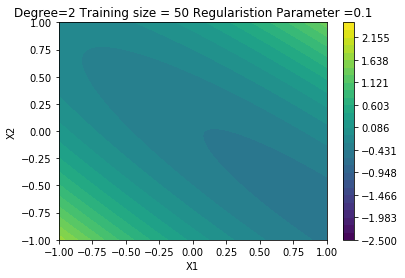

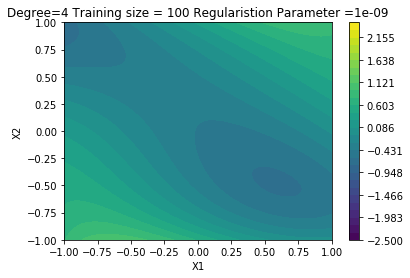

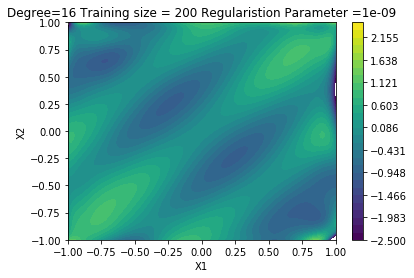

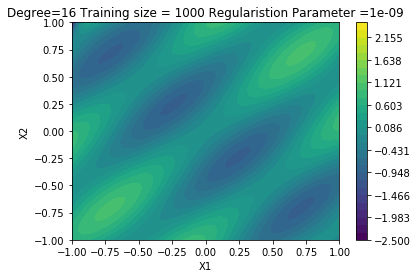

In [0]:
# Cell type : CodeWrite 
X_train1 = np.load('dataset4_1/arr_0.npy')
Y_train1 = np.load('dataset4_1/arr_1.npy')
X_test1  = np.load('dataset4_1/arr_2.npy')
Y_test1  = np.load('dataset4_1/arr_3.npy')
def polynomial_regression_ridge_pred(X_test, wt_vector, degree):
    """ Give the value of the learned polynomial function, on test data.

    For the sake of simplicity you may assume that the dimensionality of the data d=2.
    
    This should make you aware that feature vector mappings are quite complicated and 
    tedious in general.
    
    Arguments:
    X_test: numpy array of shape (n,d)
    wt_vec: numpy array of shape (d',)

    Returns:
    Y_test_pred : numpy array of shape (n,)
    
    """
    f = np.ones(len(X_test))
    for j in range(1,degree+1):
        for k in range(0,j+1):
            ta = np.transpose(X_test)[0]**k * np.transpose(X_test)[1]**(j-k)
            f  = np.vstack((f,ta))
    ans = np.matmul(f.T, wt_vector)
    return ans
    
def visualise_polynomial_2d(wt_vector, degree, title=""):
    """
    Give a contour plot over the 2d-data domain for the learned polynomial given by the weight vector wt_vector.
    
    """
    X,Y = np.meshgrid(np.linspace(-1,1,100), np.linspace(-1,1,100))

    # Get Z using other functions
    X1 = X.reshape((100*100,1))
    Y1 = Y.reshape((100*100,1))
    X_test = np.concatenate((X1,Y1),axis=1)
    Z = polynomial_regression_ridge_pred(X_test, wt_vector, degree)
    Z = Z.reshape((100,100))
    
    plt.contourf(X,Y,Z,levels=np.linspace(-2.5,2.5,30))
    plt.gca().set_title("Degree="+str(degree)+title)
    plt.gca().set_ylabel("X2")
    plt.gca().set_xlabel("X1")
    plt.colorbar()
    plt.show()
    
def polynomial_regression_ridge_train(X_train, Y_train, degree=1, reg_param=0.01):
    """ Give best polynomial fitting data, based on empirical squared error minimisation.

    Arguments:
    X_train: numpy array of shape (n,d)
    Y_train: numpy array of shape (n,)

    Returns:
    w : numpy array of shape (d',) with appropriate d'
    
    """
    f = np.ones(len(X_train))
    for j in range(1,degree+1):
        for k in range(0,j+1):
            ta = np.transpose(X_train)[0]**k * np.transpose(X_train)[1]**(j-k)
            f  = np.vstack((f,ta))
    
    f=f.T
    ftf=np.matmul(f.T,f)
    ide=np.identity(len(ftf))
    ide=ide*reg_param
    ide =ide+ftf
    
    ans= np.matmul(np.linalg.inv(ide), np.matmul(f.T, Y_train))
    return ans

def findError(degree, reg_param, num_train):
    x=X_train1[0:num_train]
    y=Y_train1[0:num_train]
    w=polynomial_regression_ridge_train(x,y,degree,reg_param)
    yp_test =polynomial_regression_ridge_pred(X_test1,w,degree)
    yp_train =polynomial_regression_ridge_pred(x,w,degree)
    trainerr=np.mean((yp_train-y)**2)
    testerr=np.mean((yp_test-Y_test1)**2)
    return w, trainerr, testerr

tr=np.ndarray(shape=(4,5,6,))
te=np.ndarray(shape=(4,5,6,))
i=0
for num in [50,100,200,1000]:
    err=1e10
    deg=reg=0
    wf=np.zeros(())
    j=0
    for degree in [1,2,4,8,16]:
        k=0
        for reg_param in [1e-9, 1e-7, 1e-5, 1e-3, 1e-1, 1e1]:
            w,tre,tee=findError(degree, reg_param, num)
            tr[i,j,k]=tre
            te[i,j,k]=tee
            if(tee<err):
                deg=degree
                wf=w
                reg=reg_param
                err=tee
            k+=1
        j+=1
    visualise_polynomial_2d(wf,deg," Training size = "+str(num)+" Regularistion Parameter ="+str(reg))
    i+=1    
#for i in range(4):
    #print(tr[i])
    #print(te[i])

** Cell type : TextWrite **
## datasize 50
### Train Error

|  degree\reg_param | 1e-09 | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0 |
|-------------- | -------------- | -------------- | -------------- | -------------- | -------------- | -------------- | 
| 1 | 0.25038312 | 0.25038312 | 0.25038312 | 0.25038312 | 0.25038442 | 0.25589783 | 
| 2 | 0.1341116 | 0.1341116 | 0.1341116 | 0.13411161 | 0.13421306 | 0.1974827 | 
| 4 | 0.10201831 | 0.10201831 | 0.10201831 | 0.10201946 | 0.10410665 | 0.18063793 | 
| 8 | 0.00013273 | 0.00019916 | 0.01076578 | 0.04172134 | 0.08199099 | 0.1631997 | 
| 16 | 2e-08 | 9.37e-06 | 0.00131769 | 0.03111309 | 0.07002071 | 0.15001286 | 

### Test Error
|  degree\reg_param | 1e-09 | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0 |
|-------------- | -------------- | -------------- | -------------- | -------------- | -------------- | -------------- | 
| 1| 0.30126682 | 0.30126682 | 0.30126677 | 0.3012625 | 0.30083822 | 0.27835069 | 
| 2| 0.15789999 | 0.15789999 | 0.15789985 | 0.15788632 | 0.15673526 | 0.20822364 | 
| 4| 0.15733397 | 0.15733396 | 0.15733295 | 0.15724278 | 0.16182639 | 0.1965686 | 
| 8| 237.69005722 | 172.50186211 | 18.59425393 | 0.99025075 | 0.16515576 | 0.19391859 | 
| 16| 250.52241931 | 232.02482827 | 66.69768436 | 2.33730833 | 0.20396146 | 0.19605732 |

## datasize 100
### Train Error
|  degree\reg_param | 1e-09 | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0 |
|-------------- | -------------- | -------------- | -------------- | -------------- | -------------- | -------------- | 
| 1 | 0.25809101 | 0.25809101 | 0.25809101 | 0.25809101 | 0.25809112 | 0.25873988 | 
| 2 | 0.13095063 | 0.13095063 | 0.13095063 | 0.13095063 | 0.13096609 | 0.16496776 | 
| 4 | 0.11302664 | 0.11302664 | 0.11302664 | 0.11302675 | 0.11365141 | 0.15237349 | 
| 8 | 0.04158793 | 0.04158794 | 0.04168004 | 0.05800847 | 0.09290161 | 0.1448857 | 
| 16 | 7.73e-06 | 0.00048397 | 0.00754402 | 0.04172918 | 0.08369694 | 0.13954384 | 

### Test Error
|  degree\reg_param | 1e-09 | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0 |
|-------------- | -------------- | -------------- | -------------- | -------------- | -------------- | -------------- | 
| 1| 0.27314864 | 0.27314864 | 0.27314863 | 0.27314798 | 0.27308304 | 0.26862154 | 
| 2| 0.15320993 | 0.15320993 | 0.1532099 | 0.15320678 | 0.15291576 | 0.17570948 | 
| 4| 0.14277575 | 0.14277576 | 0.14277607 | 0.14280764 | 0.14602043 | 0.16898019 | 
| 8| 0.71291635 | 0.71131963 | 0.58075914 | 0.20363826 | 0.16262758 | 0.17116844 | 
| 16| 54.07992563 | 11.77042012 | 23.41658885 | 0.41784851 | 0.18835914 | 0.17415997 | 

## datasize 200
### Train Error
|  degree\reg_param | 1e-09 | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0 |
|-------------- | -------------- | -------------- | -------------- | -------------- | -------------- | -------------- | 
| 1 | 0.24653507 | 0.24653507 | 0.24653507 | 0.24653507 | 0.24653509 | 0.24664115 | 
| 2 | 0.13366533 | 0.13366533 | 0.13366533 | 0.13366533 | 0.13366866 | 0.14754904 | 
| 4 | 0.11333816 | 0.11333816 | 0.11333816 | 0.11333819 | 0.11358989 | 0.1444444 | 
| 8 | 0.06173732 | 0.06173732 | 0.0617381 | 0.06394973 | 0.09568723 | 0.14119279 | 
| 16 | 2.882e-05 | 0.00108543 | 0.01132556 | 0.04446327 | 0.08349957 | 0.1337626 | 

### Test Error

|  degree\reg_param | 1e-09 | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0 |
|-------------- | -------------- | -------------- | -------------- | -------------- | -------------- | -------------- | 
| 1| 0.26766305 | 0.26766305 | 0.26766305 | 0.26766288 | 0.26764571 | 0.26622547 | 
| 2| 0.14578065 | 0.14578065 | 0.14578065 | 0.14578035 | 0.14575448 | 0.15868223 | 
| 4| 0.13117097 | 0.13117097 | 0.1311709 | 0.13116415 | 0.13083053 | 0.15708512 | 
| 8| 0.13736299 | 0.13735918 | 0.13698205 | 0.11818259 | 0.11396536 | 0.15645118 | 
| 16| 0.03715016 | 0.08371021 | 0.17080666 | 0.0869037 | 0.11121403 | 0.15224401 |

## datasize 1000
### Train Error
|  degree\reg_param | 1e-09 | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0 |
|-------------- | -------------- | -------------- | -------------- | -------------- | -------------- | -------------- | 
| 1| 0.24072822 | 0.24072822 | 0.24072822 | 0.24072822 | 0.24072822 | 0.24072872 | 
| 2| 0.1388241 | 0.1388241 | 0.1388241 | 0.1388241 | 0.13882421 | 0.13971802 | 
| 4| 0.12501724 | 0.12501724 | 0.12501724 | 0.12501724 | 0.12502512 | 0.13417203 | 
| 8| 0.07674285 | 0.07674285 | 0.07674287 | 0.07684622 | 0.09483803 | 0.12843823 | 
| 16| 2.549e-05 | 0.00044513 | 0.00653349 | 0.03841534 | 0.08499258 | 0.12168732 | 

### Test Error

|  degree\reg_param | 1e-09 | 1e-07 | 1e-05 | 0.001 | 0.1 | 10.0 |
|-------------- | -------------- | -------------- | -------------- | -------------- | -------------- | -------------- | 
| 1| 0.26253465 | 0.26253465 | 0.26253465 | 0.26253465 | 0.2625346 | 0.2625303 | 
| 2| 0.14242932 | 0.14242932 | 0.14242932 | 0.14242945 | 0.14244207 | 0.14451885 | 
| 4| 0.12707963 | 0.12707963 | 0.12707964 | 0.12708121 | 0.12724209 | 0.14093659 | 
| 8| 0.08481274 | 0.08481261 | 0.08480025 | 0.08391324 | 0.09782269 | 0.13498892 | 
| 16| 0.00119773 | 0.00149007 | 0.01095719 | 0.04965813 | 0.0907374 | 0.1278209 |


### Conclusion
* As degree increases, the training error always decreases.
* The training error is always generally lesser than the test error for given degree and regularisation parameter.
* As regularisation parameter increases the training error always increases.
* As the datasize increases generally with a few exceptions the training error increases with larger training data size
* As the datasize increases generally with a few exceptions the test error decreases with larger training data size
* For smaller datasets and higher degree increased regularisation decreases test error significantly.
* With larger datasets and higher degree increased regularisation increases test error significantly.
* High regularisation gives almost constant error across all degrees(except linear) and  all dataset sizes